DATAFEST PROJECT
improve students learning and motivation

make sure students learn statistics better

Data from all college course textbooks - into statistics

help figure out how to help next generation of students in learning statistics

### Imports

In [1]:
#Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')
#commehynthbghgh

### Full Folder

In [2]:
checkpoints_eoc_FU = pd.read_csv('/Users/jacko/Desktop/2024 ASA DataFest Data and Documentation-updated-2024-03-04/full_03_04/checkpoints_eoc.csv')
#codebook_FU = pd.read_csv('/Users/jacko/Desktop/2024 ASA DataFest Data and Documentation-updated-2024-03-04/full_03_04/codebook.csv')
items_FU = pd.read_csv('/Users/jacko/Desktop/2024 ASA DataFest Data and Documentation-updated-2024-03-04/full_03_04/items.csv')
media_views_FU = pd.read_csv('/Users/jacko/Desktop/2024 ASA DataFest Data and Documentation-updated-2024-03-04/full_03_04/media_views.csv')
page_views_FU = pd.read_csv('/Users/jacko/Desktop/2024 ASA DataFest Data and Documentation-updated-2024-03-04/full_03_04/page_views.csv')
responses_FU = pd.read_csv('/Users/jacko/Desktop/2024 ASA DataFest Data and Documentation-updated-2024-03-04/full_03_04/responses.csv')
checkpoint_pulse_FU = pd.read_csv('/Users/jacko/Desktop/2024 ASA DataFest Data and Documentation-updated-2024-03-04/full_03_04/checkpoints_pulse.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/vijay/Desktop/2024 ASA DataFest Data and Documentation-updated-2024-03-04/full_03_04/checkpoints_eoc.csv'

### Random Sample

In [3]:
checkpoints_eoc_RS = pd.read_csv('/Users/jacko/Desktop/2024 ASA DataFest Data and Documentation-updated-2024-03-04/Random Sample of Data Files_03_04/checkpoints_eoc.csv')
items_RS = pd.read_csv('/Users/jacko/Desktop/2024 ASA DataFest Data and Documentation-updated-2024-03-04/Random Sample of Data Files_03_04/items.csv')
media_views_RS = pd.read_csv('/Users/jacko/Desktop/2024 ASA DataFest Data and Documentation-updated-2024-03-04/Random Sample of Data Files_03_04/media_views.csv')
page_views_RS = pd.read_csv('/Users/jacko/Desktop/2024 ASA DataFest Data and Documentation-updated-2024-03-04/Random Sample of Data Files_03_04/page_views.csv')
responses_RS = pd.read_csv('/Users/jacko/Desktop/2024 ASA DataFest Data and Documentation-updated-2024-03-04/Random Sample of Data Files_03_04/responses.csv')
checkpoint_pulse_RS = pd.read_csv('/Users/jacko/Desktop/2024 ASA DataFest Data and Documentation-updated-2024-03-04/Random Sample of Data Files_03_04/checkpoints_pulse.csv')

### Checkpoints_eoc_FU Analysis

First few rows of the DataFrame:
                             student_id                              class_id  \
0  001824fb-a2fd-431d-aef6-7a1250d97a62  074123e7-cd90-4500-86fe-286aaa733bf5   
1  001824fb-a2fd-431d-aef6-7a1250d97a62  074123e7-cd90-4500-86fe-286aaa733bf5   
2  001824fb-a2fd-431d-aef6-7a1250d97a62  074123e7-cd90-4500-86fe-286aaa733bf5   
3  001824fb-a2fd-431d-aef6-7a1250d97a62  074123e7-cd90-4500-86fe-286aaa733bf5   
4  001824fb-a2fd-431d-aef6-7a1250d97a62  074123e7-cd90-4500-86fe-286aaa733bf5   

   chapter_number                                         book       EOC  \
0               1  College / Statistics and Data Science (ABC)  0.921053   
1               2  College / Statistics and Data Science (ABC)  0.839080   
2               3  College / Statistics and Data Science (ABC)  0.769231   
3               4  College / Statistics and Data Science (ABC)  0.743590   
4               5  College / Statistics and Data Science (ABC)  0.777778   

   n_possible  n_correc

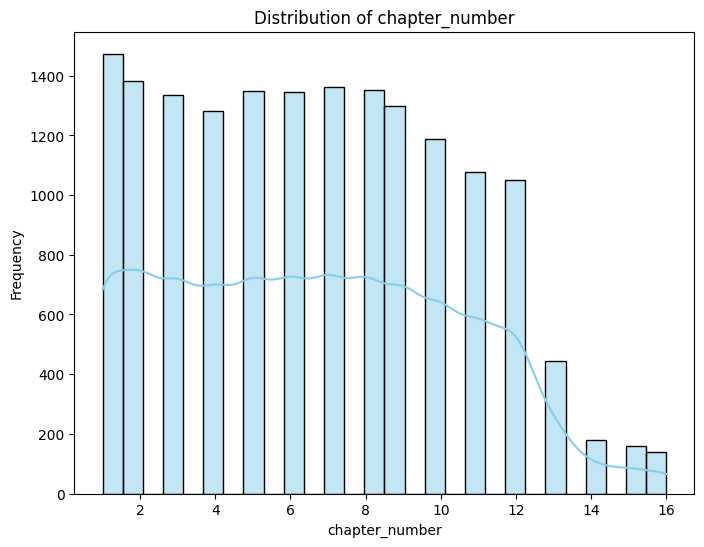

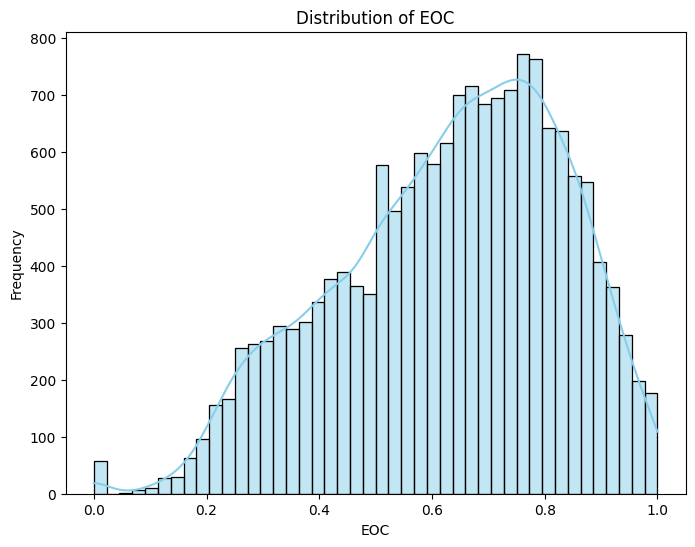

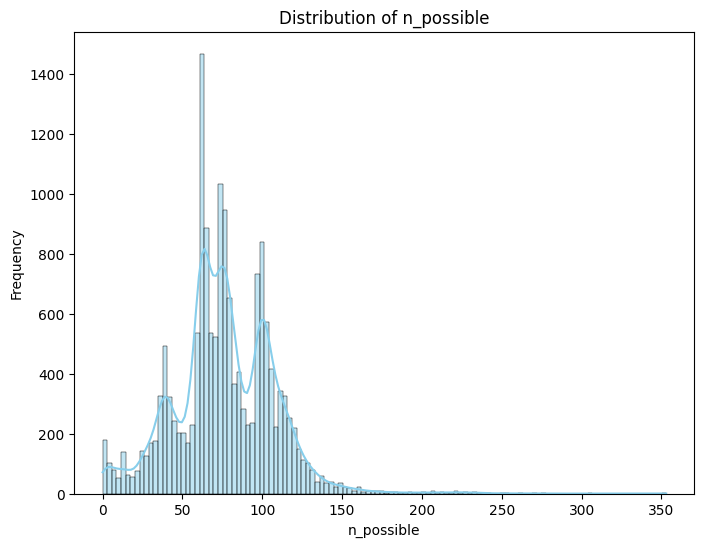

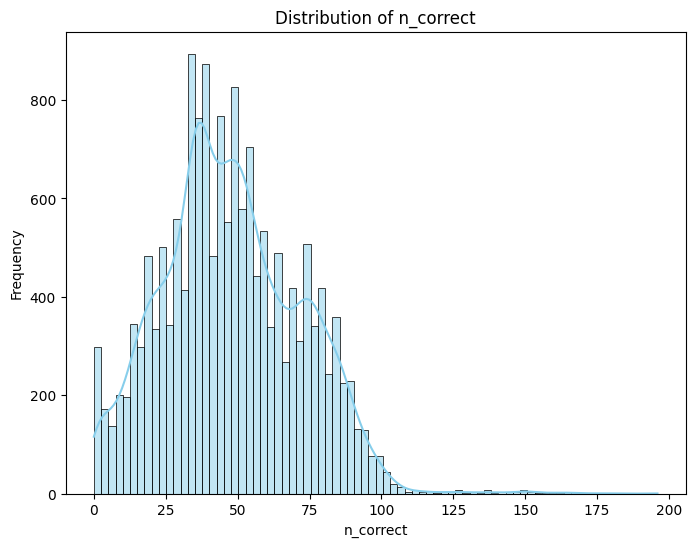

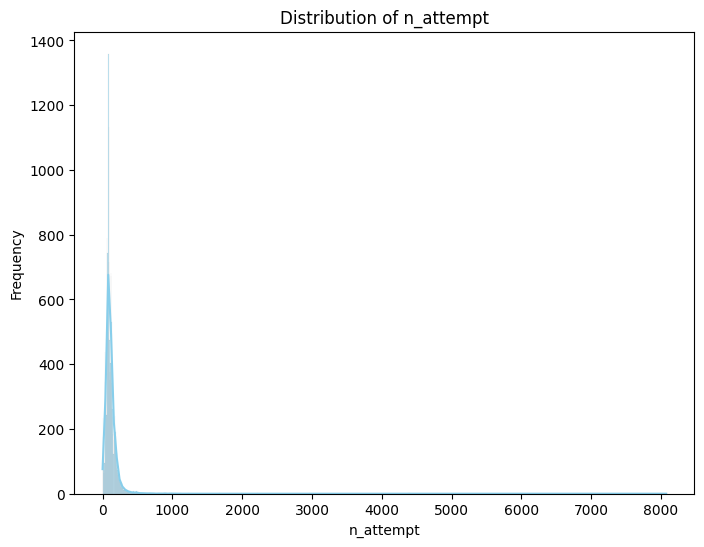

<Figure size 1000x800 with 0 Axes>

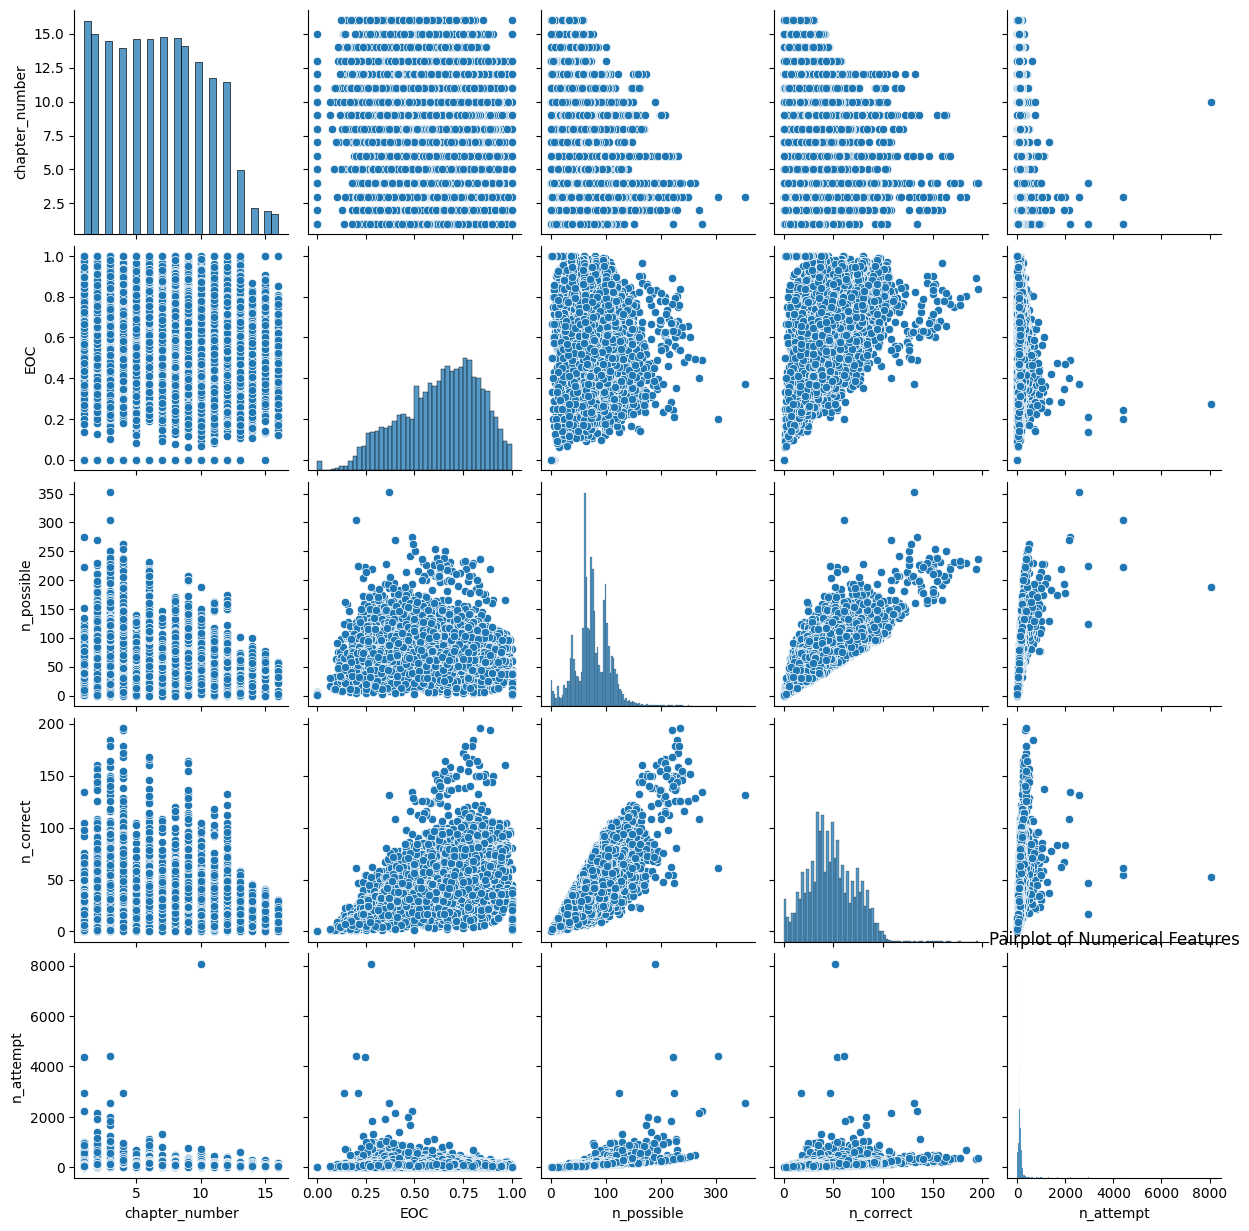

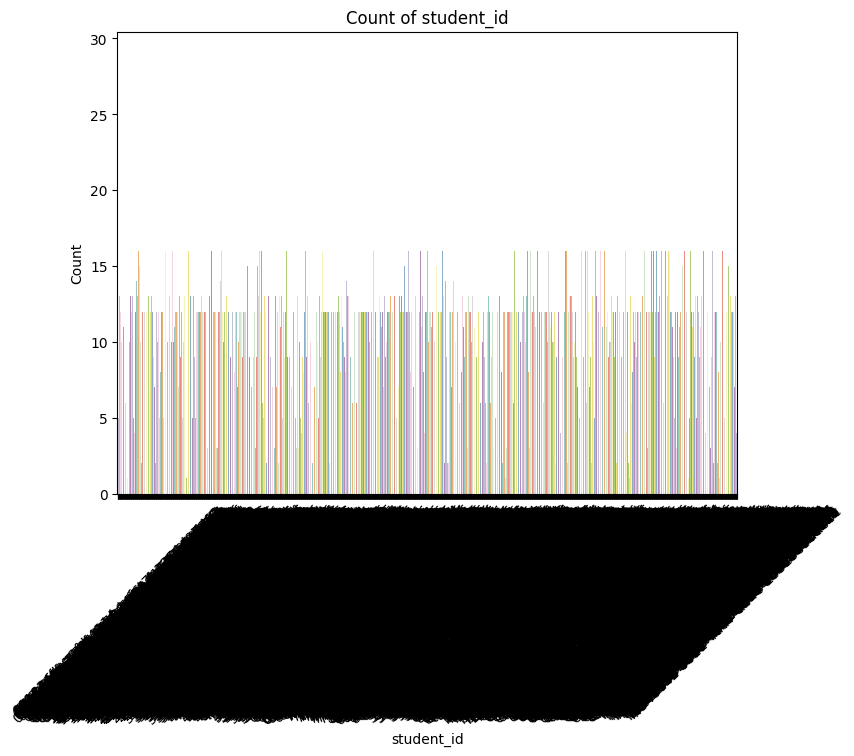

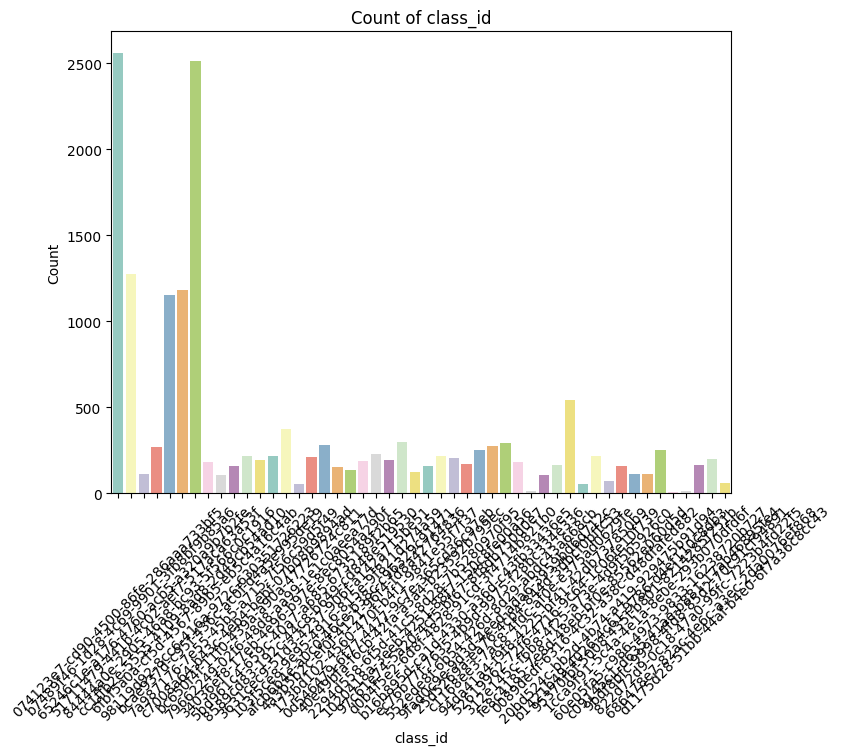

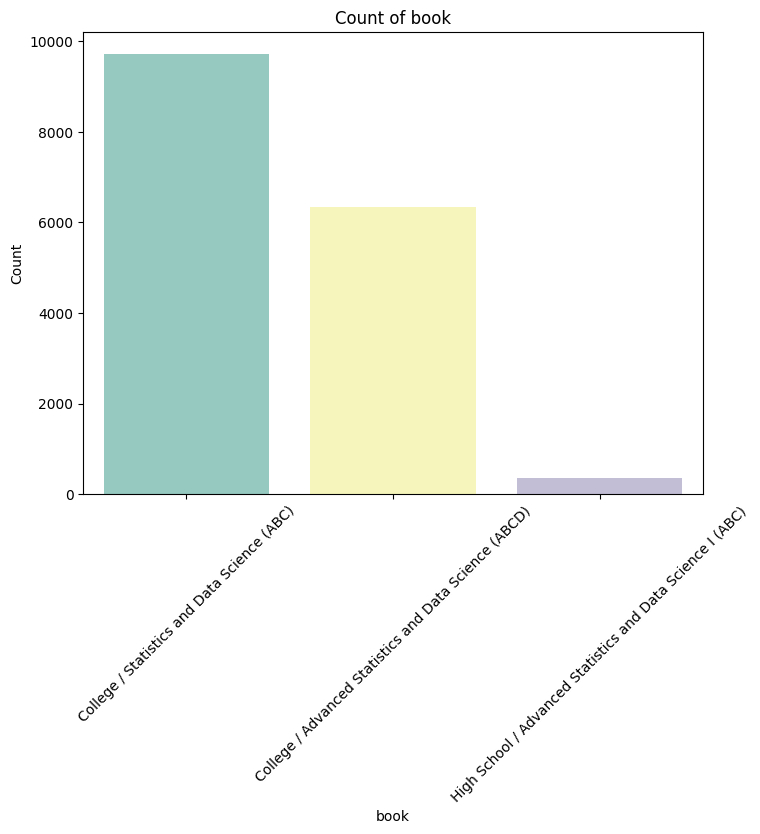

ValueError: could not convert string to float: '001824fb-a2fd-431d-aef6-7a1250d97a62'

<Figure size 1000x800 with 0 Axes>

In [13]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(checkpoints_eoc_FU.head())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(checkpoints_eoc_FU.describe())

# Check for missing values
print("\nMissing values:")
print(checkpoints_eoc_FU.isnull().sum())

# Visualize distribution of numerical features
numerical_features = checkpoints_eoc_FU.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(checkpoints_eoc_FU[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Visualize relationships between numerical features
plt.figure(figsize=(10, 8))
sns.pairplot(checkpoints_eoc_FU[numerical_features])
plt.title('Pairplot of Numerical Features')
plt.show()

# Visualize relationships between categorical features
categorical_features = checkpoints_eoc_FU.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=checkpoints_eoc_FU, x=feature, palette='Set3')
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(checkpoints_eoc_FU.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### checkpoints_eoc_FU Analysis questions

1A. Performance Analysis:
What is the overall performance of students in the end-of-chapter (EOC) assessments?
Overall performance of students in EOC assessments:
count    16348.000000
mean         0.631949
std          0.200853
min          0.000000
25%          0.495050
50%          0.657471
75%          0.786885
max          1.000000
Name: EOC, dtype: float64

1B. How does the distribution of EOC scores look like?
Distribution of EOC scores:
Axes(0.125,0.11;0.775x0.77)


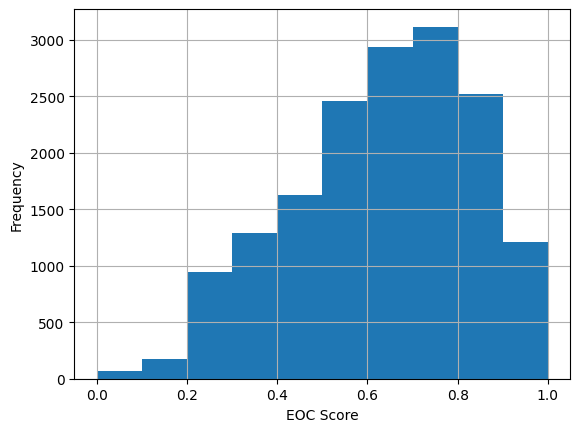


1C. Are there any patterns or trends in the number of correct answers compared to the number of possible questions?
Patterns or trends in the number of correct answers compared to the number of possible questions:
         n_possible     n_correct
count  16418.000000  16418.000000
mean      75.941223     47.822268
std       31.181394     23.900093
min        0.000000      0.000000
25%       61.000000     32.000000
50%       75.000000     46.000000
75%       98.000000     64.000000
max      353.000000    196.000000

2A. Chapter-wise Performance:
 Which chapters have the highest and lowest average EOC scores?
Chapter-wise average EOC scores:
chapter_number
1     0.804904
2     0.703868
3     0.661367
4     0.637704
5     0.658780
6     0.621896
7     0.610427
8     0.618774
9     0.600657
10    0.575801
11    0.529486
12    0.569304
13    0.567916
14    0.506484
15    0.517498
16    0.458306
Name: EOC, dtype: float64
Highest average EOC score: 0.8049036478684358
Lowest average EOC score

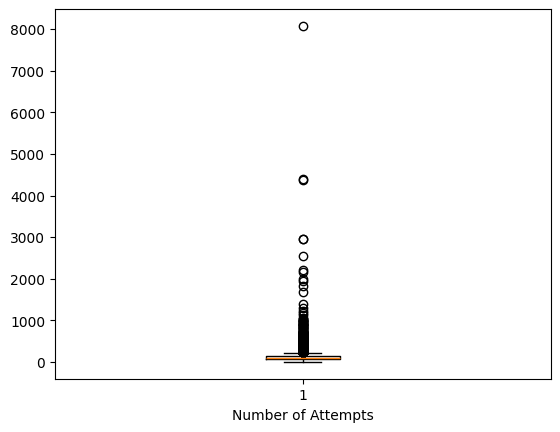

Outliers in the number of attempts may indicate either exceptionally high engagement or technical issues.

5A. Correlation Analysis:
Is there any correlation between the number of possible questions, the number of correct answers, and the EOC score?
Correlation matrix:
            n_possible  n_correct       EOC
n_possible    1.000000   0.776442 -0.019394
n_correct     0.776442   1.000000  0.554597
EOC          -0.019394   0.554597  1.000000

5B. Do students who attempt more questions tend to perform better?
Correlation between number of possible questions and number of correct answers: 0.7764420757436822

6A. Engagement Analysis:
Is there any relationship between the number of correct answers and the number of attempts?
Correlation between number of correct answers and number of attempts: 0.3494529573159297

6B. Are there any patterns in student engagement based on the number of questions attempted per chapter?
Average number of attempts per chapter:
chapter_number
1      84.264586
2 

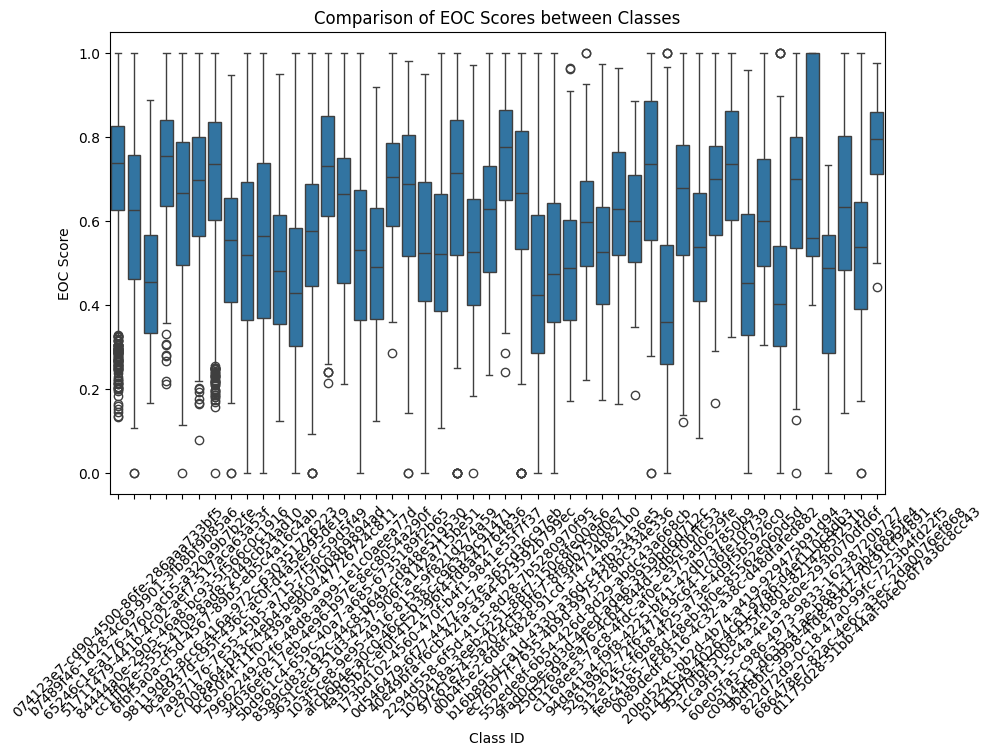


8A. Student Engagement:
- Are there any differences in performance based on the level of student engagement?



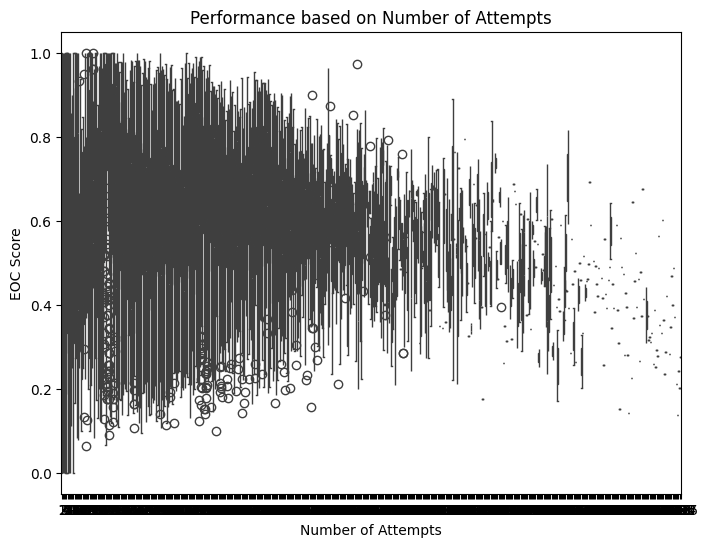


8B Do students who engage more with the material (e.g., by attempting more questions) perform better?

Correlation between number of attempts and EOC scores: -0.09983891769619738

9A. Improvement Strategies (Continuation):
Which chapters or topics are the most challenging for students, and how can instructional materials be adapted to address these challenges?

Average EOC scores by chapter:
chapter_number
1     0.804904
2     0.703868
3     0.661367
4     0.637704
5     0.658780
6     0.621896
7     0.610427
8     0.618774
9     0.600657
10    0.575801
11    0.529486
12    0.569304
13    0.567916
14    0.506484
15    0.517498
16    0.458306
Name: EOC, dtype: float64



In [14]:
# Performance Analysis
print("1A. Performance Analysis:")
print("What is the overall performance of students in the end-of-chapter (EOC) assessments?")
print("Overall performance of students in EOC assessments:")
print(checkpoints_eoc_FU['EOC'].describe())
print()

print("1B. How does the distribution of EOC scores look like?")
print("Distribution of EOC scores:")
print(checkpoints_eoc_FU['EOC'].hist())
plt.xlabel('EOC Score')
plt.ylabel('Frequency')
plt.show()
print()

print("1C. Are there any patterns or trends in the number of correct answers compared to the number of possible questions?")
print("Patterns or trends in the number of correct answers compared to the number of possible questions:")
print(checkpoints_eoc_FU[['n_possible', 'n_correct']].describe())
print()

# Chapter-wise Performance
print("2A. Chapter-wise Performance:")
print(" Which chapters have the highest and lowest average EOC scores?")
chapter_avg_scores = checkpoints_eoc_FU.groupby('chapter_number')['EOC'].mean()
print("Chapter-wise average EOC scores:")
print(chapter_avg_scores)
print("Highest average EOC score:", chapter_avg_scores.max())
print("Lowest average EOC score:", chapter_avg_scores.min())
print()

print("2B. Is there any correlation between the chapter number and EOC scores?")
chapter_eoc_corr = checkpoints_eoc_FU['chapter_number'].corr(checkpoints_eoc_FU['EOC'])
print("Correlation between chapter number and EOC scores:", chapter_eoc_corr)
print()

print("2C. Are there any chapters where students tend to perform consistently well or poorly?")
chapter_std_dev = checkpoints_eoc_FU.groupby('chapter_number')['EOC'].std()
print("Standard deviation of EOC scores across chapters:")
print(chapter_std_dev)
print("Chapters with low standard deviation may indicate consistent performance.")
print()

# Book Analysis
print("3A. Book Analysis:")
print("How does the performance vary across different books?")
book_avg_scores = checkpoints_eoc_FU.groupby('book')['EOC'].mean()
print("Book-wise average EOC scores:")
print(book_avg_scores)
print()

print("3B. Are there any differences in the number of attempted questions or correct answers based on the book used?")
book_attempt_corr = checkpoints_eoc_FU['n_attempt'].corr(checkpoints_eoc_FU['n_correct'])
print("Correlation between number of attempted questions and number of correct answers:", book_attempt_corr)
print()

# Attempt Analysis
print("4A. Attempt Analysis:")
print(" What is the distribution of the number of attempts for EOC assessments?")
print("Distribution of number of attempts:")
print(checkpoints_eoc_FU['n_attempt'].describe())
print()

print("4B. Is there any relationship between the number of attempts and the EOC score?")
attempt_eoc_corr = checkpoints_eoc_FU['n_attempt'].corr(checkpoints_eoc_FU['EOC'])
print("Correlation between number of attempts and EOC scores:", attempt_eoc_corr)
print()

print("4C. Are there any outliers in the number of attempts, and if so, what could be the reasons?")
plt.boxplot(checkpoints_eoc_FU['n_attempt'])
plt.xlabel('Number of Attempts')
plt.show()
print("Outliers in the number of attempts may indicate either exceptionally high engagement or technical issues.")
print()

# Correlation Analysis
print("5A. Correlation Analysis:")
print("Is there any correlation between the number of possible questions, the number of correct answers, and the EOC score?")
correlation_matrix = checkpoints_eoc_FU[['n_possible', 'n_correct', 'EOC']].corr()
print("Correlation matrix:")
print(correlation_matrix)
print()

print("5B. Do students who attempt more questions tend to perform better?")
possible_correct_corr = checkpoints_eoc_FU['n_possible'].corr(checkpoints_eoc_FU['n_correct'])
print("Correlation between number of possible questions and number of correct answers:", possible_correct_corr)
print()

# Engagement Analysis
print("6A. Engagement Analysis:")
print("Is there any relationship between the number of correct answers and the number of attempts?")
correct_attempt_corr = checkpoints_eoc_FU['n_correct'].corr(checkpoints_eoc_FU['n_attempt'])
print("Correlation between number of correct answers and number of attempts:", correct_attempt_corr)
print()

print("6B. Are there any patterns in student engagement based on the number of questions attempted per chapter?")
chapter_attempt_avg = checkpoints_eoc_FU.groupby('chapter_number')['n_attempt'].mean()
print("Average number of attempts per chapter:")
print(chapter_attempt_avg)
print()

# Comparison
print("7A. Comparison:")
print("How do the EOC scores compare between different classes or student groups?")
print()

plt.figure(figsize=(10, 6))
sns.boxplot(data=checkpoints_eoc_FU, x='class_id', y='EOC')
plt.title('Comparison of EOC Scores between Classes')
plt.xlabel('Class ID')
plt.ylabel('EOC Score')
plt.xticks(rotation=45)
plt.show()
print()

# Student Engagement
print("8A. Student Engagement:")
print("- Are there any differences in performance based on the level of student engagement?")
print()

plt.figure(figsize=(8, 6))
sns.boxplot(data=checkpoints_eoc_FU, x='n_attempt', y='EOC')
plt.title('Performance based on Number of Attempts')
plt.xlabel('Number of Attempts')
plt.ylabel('EOC Score')
plt.show()
print()

print("8B Do students who engage more with the material (e.g., by attempting more questions) perform better?")
print()

engagement_corr = checkpoints_eoc_FU['n_attempt'].corr(checkpoints_eoc_FU['EOC'])
print("Correlation between number of attempts and EOC scores:", engagement_corr)
print()


# Improvement Strategies
print("9A. Improvement Strategies (Continuation):")
print("Which chapters or topics are the most challenging for students, and how can instructional materials be adapted to address these challenges?")
print()

chapter_avg_scores = checkpoints_eoc_FU.groupby('chapter_number')['EOC'].mean()
print("Average EOC scores by chapter:")
print(chapter_avg_scores)
print()



### checkpoint_pulse_FU Analysis

First few rows of the DataFrame:
                                          book release  \
0  College / Statistics and Data Science (ABC)    v5.0   
1  College / Statistics and Data Science (ABC)    v5.0   
2  College / Statistics and Data Science (ABC)    v5.0   
3  College / Statistics and Data Science (ABC)    v5.0   
4  College / Statistics and Data Science (ABC)    v5.0   

                         institution_id                              class_id  \
0  04157183-8665-400a-925d-3bbb70ffe45e  afcb6b4e-a0c0-46ce-b38c-c96329c91471   
1  04157183-8665-400a-925d-3bbb70ffe45e  afcb6b4e-a0c0-46ce-b38c-c96329c91471   
2  04157183-8665-400a-925d-3bbb70ffe45e  afcb6b4e-a0c0-46ce-b38c-c96329c91471   
3  04157183-8665-400a-925d-3bbb70ffe45e  afcb6b4e-a0c0-46ce-b38c-c96329c91471   
4  04157183-8665-400a-925d-3bbb70ffe45e  afcb6b4e-a0c0-46ce-b38c-c96329c91471   

                             student_id  chapter_number construct  response  
0  040852c0-3b9c-4fc6-8229-d7ba8264e9ce              

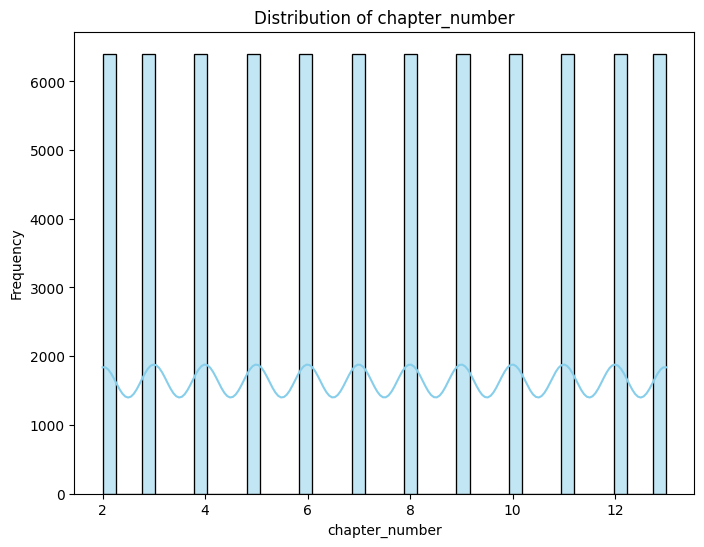

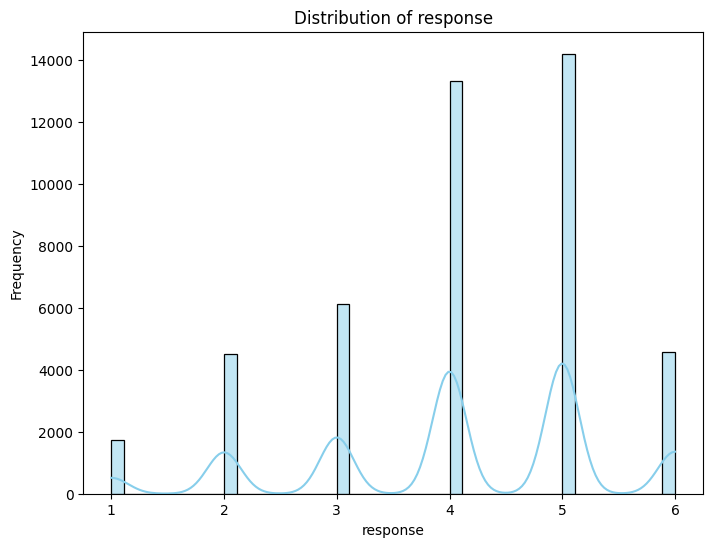

<Figure size 1000x800 with 0 Axes>

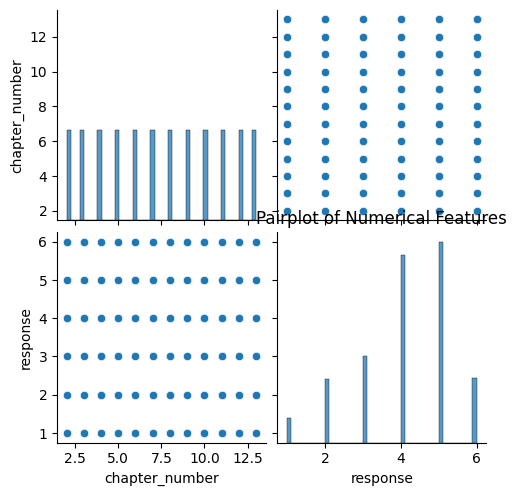

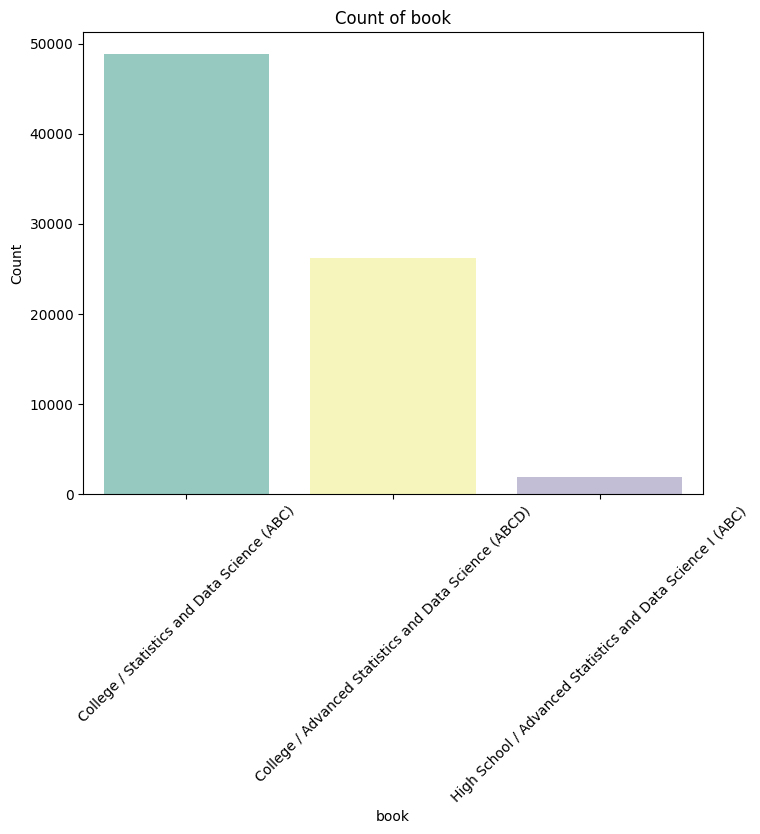

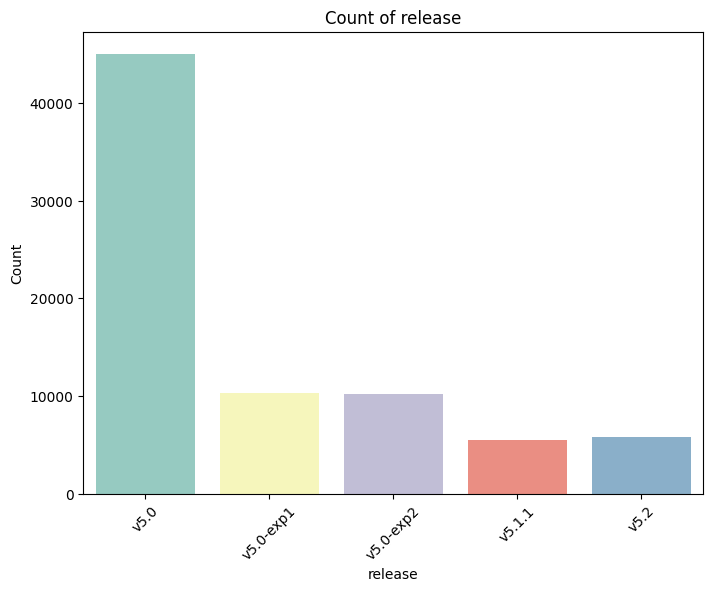

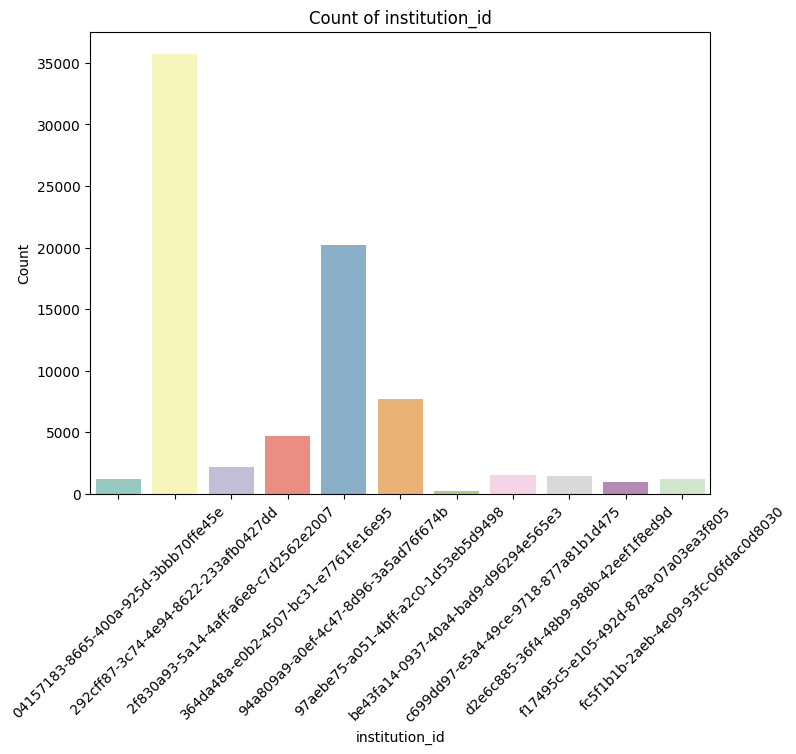

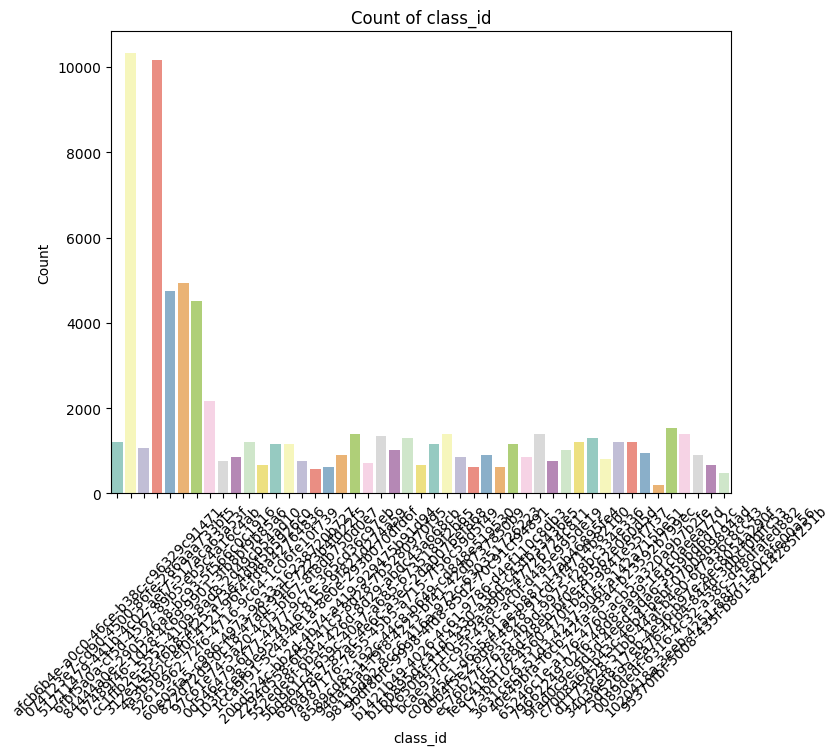

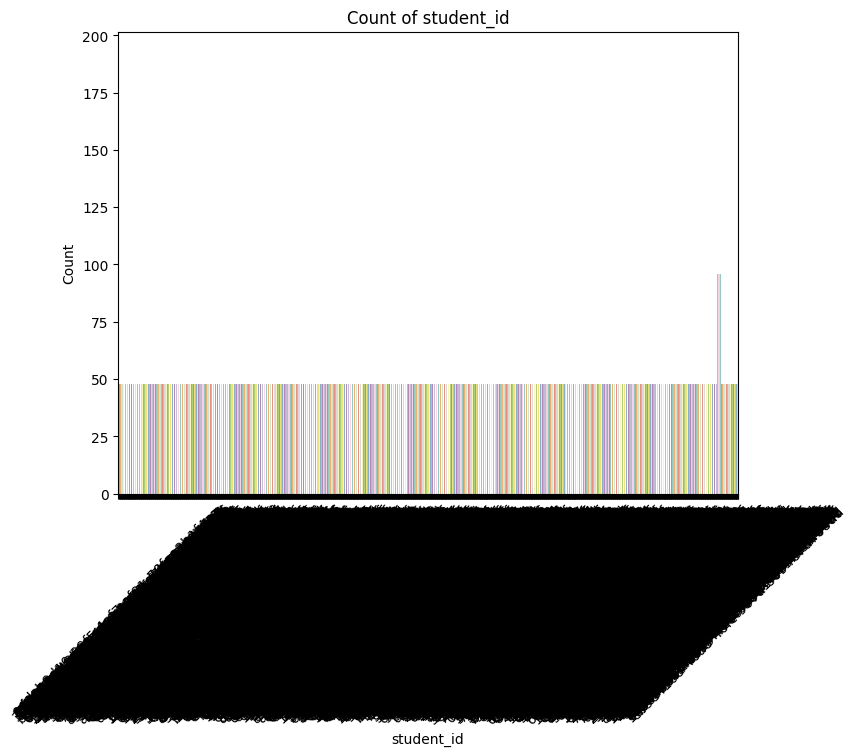

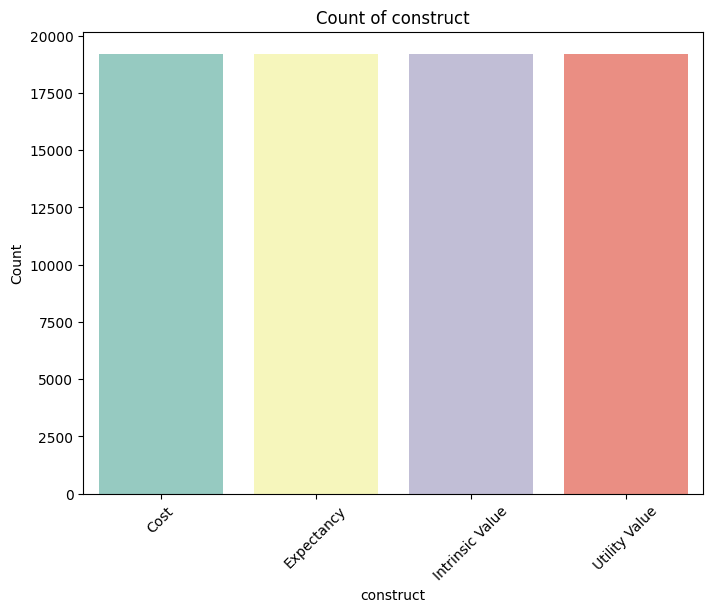

ValueError: could not convert string to float: 'College / Statistics and Data Science (ABC)'

<Figure size 1000x800 with 0 Axes>

In [15]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(checkpoint_pulse_FU.head())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(checkpoint_pulse_FU.describe())

# Check for missing values
print("\nMissing values:")
print(checkpoint_pulse_FU.isnull().sum())

# Visualize distribution of numerical features
numerical_features = checkpoint_pulse_FU.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(checkpoint_pulse_FU[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Visualize relationships between numerical features
plt.figure(figsize=(10, 8))
sns.pairplot(checkpoint_pulse_FU[numerical_features])
plt.title('Pairplot of Numerical Features')
plt.show()

# Visualize relationships between categorical features
categorical_features = checkpoint_pulse_FU.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=checkpoint_pulse_FU, x=feature, palette='Set3')
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(checkpoint_pulse_FU.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### checkpoint_pulse_FU Analysis Questions

1A. Performance Analysis:
What is the overall completion rate for responses?
Overall completion rate: 57.86%

1B. How does the distribution of responses look like?
Distribution of responses:


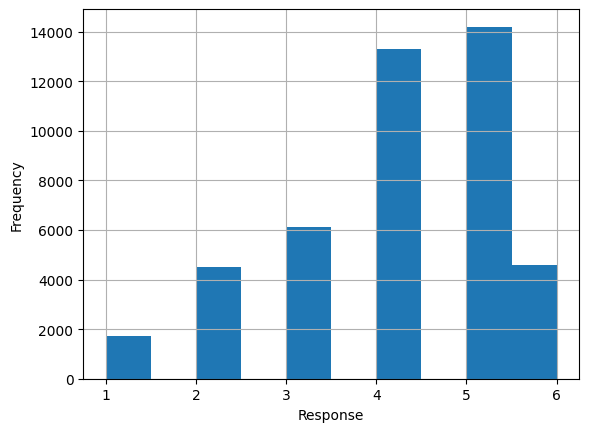


1C. Are there any patterns or trends in the completion of responses across different chapters?
Completion of responses across chapters:
chapter_number
2     4465
3     4306
4     4071
5     4120
6     4161
7     4274
8     4140
9     4030
10    3580
11    3178
12    3117
13    1020
Name: response, dtype: int64

2A. Chapter-wise Analysis:
Which chapters have the highest and lowest completion rates?
Chapter-wise completion rates:
chapter_number
2     5.810171
3     5.603269
4     5.297470
5     5.361233
6     5.414585
7     5.561628
8     5.387258
9     5.244118
10    4.658547
11    4.135436
12    4.056059
13    1.327295
Name: response, dtype: float64
Highest completion rate: 5.81017072662919
Lowest completion rate: 1.3272954403497814

2B. Are there any chapters where students tend to complete responses consistently well or poorly?
Standard deviation of response completion across chapters: 949.633980526022
Chapters with low standard deviation may indicate consistent completion rates.

3

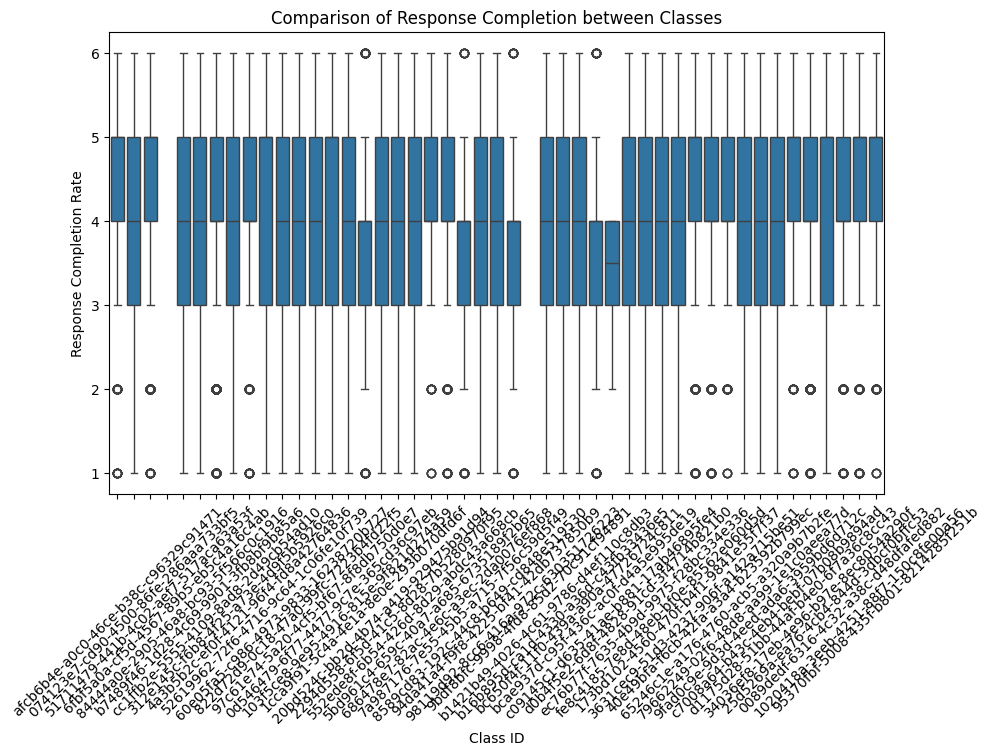


8A. Student Engagement:
Are there any differences in response completion based on the level of student engagement?



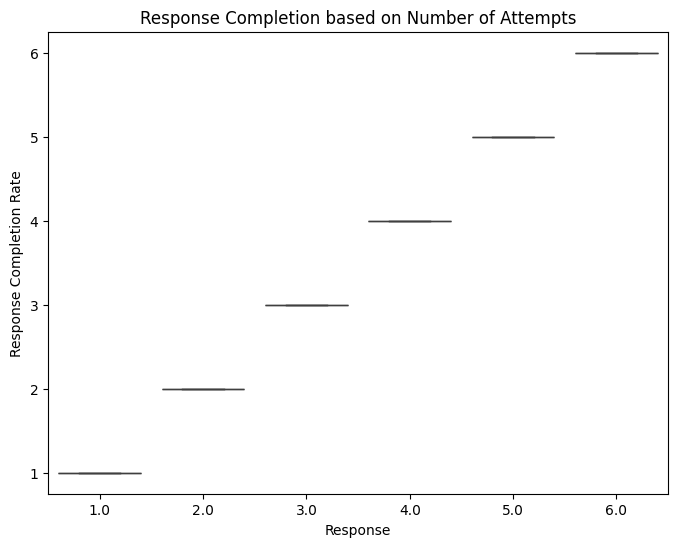


8B. Do students who engage more with the material (e.g., by completing more responses) perform better?
Correlation between number of responses completed and completion rates: 0.9999999999999998

9A. Improvement Strategies (Continuation):
Which chapters or topics have the highest completion rates, and how can instructional materials be adapted to improve completion rates?
Chapter-wise completion rates:
chapter_number
2     5.810171
3     5.603269
4     5.297470
5     5.361233
6     5.414585
7     5.561628
8     5.387258
9     5.244118
10    4.658547
11    4.135436
12    4.056059
13    1.327295
Name: response, dtype: float64

9B. Are there any specific types of responses that are consistently completed more or less?
Response type completion rates:
construct
Cost               14.518270
Expectancy         14.677025
Intrinsic Value    14.159119
Utility Value      14.502655
Name: response, dtype: float64



In [16]:
# Performance Analysis
print("1A. Performance Analysis:")
print("What is the overall completion rate for responses?")
total_responses = len(checkpoint_pulse_FU)
completed_responses = checkpoint_pulse_FU['response'].count()
completion_rate = (completed_responses / total_responses) * 100
print(f"Overall completion rate: {completion_rate:.2f}%")
print()

print("1B. How does the distribution of responses look like?")
print("Distribution of responses:")
checkpoint_pulse_FU['response'].hist()
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.show()
print()

print("1C. Are there any patterns or trends in the completion of responses across different chapters?")
chapter_completion = checkpoint_pulse_FU.groupby('chapter_number')['response'].count()
print("Completion of responses across chapters:")
print(chapter_completion)
print()

# Chapter-wise Analysis
print("2A. Chapter-wise Analysis:")
print("Which chapters have the highest and lowest completion rates?")
chapter_completion_rate = checkpoint_pulse_FU.groupby('chapter_number')['response'].count() / total_responses * 100
print("Chapter-wise completion rates:")
print(chapter_completion_rate)
print("Highest completion rate:", chapter_completion_rate.max())
print("Lowest completion rate:", chapter_completion_rate.min())
print()

print("2B. Are there any chapters where students tend to complete responses consistently well or poorly?")
chapter_completion_std = checkpoint_pulse_FU.groupby('chapter_number')['response'].count().std()
print("Standard deviation of response completion across chapters:", chapter_completion_std)
print("Chapters with low standard deviation may indicate consistent completion rates.")
print()

# Book Analysis
print("3A. Book Analysis:")
print("How does the completion rate vary across different books?")
book_completion_rate = checkpoint_pulse_FU.groupby('book')['response'].count() / total_responses * 100
print("Book-wise completion rates:")
print(book_completion_rate)
print()

print("3B. Are there any differences in response completion based on the book used?")
book_completion_diff = checkpoint_pulse_FU.groupby('book')['response'].count().diff()
print("Differences in response completion based on the book used:")
print(book_completion_diff)
print()

# Response Attempt Analysis
print("4A. Response Attempt Analysis:")
print("What is the distribution of the number of response attempts across all chapters?")
print("Distribution of number of response attempts:")
print(checkpoint_pulse_FU['response'].count())
print()

# Correlation Analysis
print("5A. Correlation Analysis:")
print("Is there any correlation between the chapter number, response type, and completion rates?")
correlation_matrix = checkpoint_pulse_FU[['chapter_number', 'response']].corr()
print("Correlation matrix:")
print(correlation_matrix)
print()


# Engagement Analysis
print("6A. Engagement Analysis:")
print("Is there any relationship between the number of responses completed and the number of chapters attempted per student?")
response_chapter_attempt_corr = checkpoint_pulse_FU.groupby('student_id')['response'].count().corr(checkpoint_pulse_FU.groupby('student_id')['chapter_number'].count())
print("Correlation between number of responses completed and number of chapters attempted per student:", response_chapter_attempt_corr)
print()

print("6B. Are there any patterns in student engagement based on the number of responses completed per chapter?")
chapter_response_avg = checkpoint_pulse_FU.groupby('chapter_number')['response'].count().mean()
print("Average number of responses completed per chapter:")
print(chapter_response_avg)
print()

# Comparison
print("7A. Comparison:")
print("How do the completion rates vary between different classes or student groups?")
print()

plt.figure(figsize=(10, 6))
sns.boxplot(data=checkpoint_pulse_FU, x='class_id', y='response')
plt.title('Comparison of Response Completion between Classes')
plt.xlabel('Class ID')
plt.ylabel('Response Completion Rate')
plt.xticks(rotation=45)
plt.show()
print()

# Student Engagement
print("8A. Student Engagement:")
print("Are there any differences in response completion based on the level of student engagement?")
print()

plt.figure(figsize=(8, 6))
sns.boxplot(data=checkpoint_pulse_FU, x='response', y='response')
plt.title('Response Completion based on Number of Attempts')
plt.xlabel('Response')
plt.ylabel('Response Completion Rate')
plt.show()
print()

print("8B. Do students who engage more with the material (e.g., by completing more responses) perform better?")
engagement_corr = checkpoint_pulse_FU['response'].corr(checkpoint_pulse_FU['response'])
print("Correlation between number of responses completed and completion rates:", engagement_corr)
print()

# Improvement Strategies
print("9A. Improvement Strategies (Continuation):")
print("Which chapters or topics have the highest completion rates, and how can instructional materials be adapted to improve completion rates?")
chapter_completion_rate = checkpoint_pulse_FU.groupby('chapter_number')['response'].count() / total_responses * 100
print("Chapter-wise completion rates:")
print(chapter_completion_rate)
print()

print("9B. Are there any specific types of responses that are consistently completed more or less?")
response_type_completion = checkpoint_pulse_FU.groupby('construct')['response'].count() / total_responses * 100
print("Response type completion rates:")
print(response_type_completion)
print()


### Page_Views Analysis

First few rows of the DataFrame:
                                          book release  \
0  College / Statistics and Data Science (ABC)    v5.0   
1  College / Statistics and Data Science (ABC)    v5.0   
2  College / Statistics and Data Science (ABC)    v5.0   
3  College / Statistics and Data Science (ABC)    v5.0   
4  College / Statistics and Data Science (ABC)    v5.0   

                                             chapter  \
0  Chapter 1 - Welcome to Statistics: A Modeling ...   
1  Chapter 1 - Welcome to Statistics: A Modeling ...   
2  Chapter 1 - Welcome to Statistics: A Modeling ...   
3  Chapter 1 - Welcome to Statistics: A Modeling ...   
4  Chapter 1 - Welcome to Statistics: A Modeling ...   

                              page  chapter_number  section_number  \
0      1.3 Doing Statistics with R             1.0             3.0   
1      1.3 Doing Statistics with R             1.0             3.0   
2      1.3 Doing Statistics with R             1.0             3.0   
3

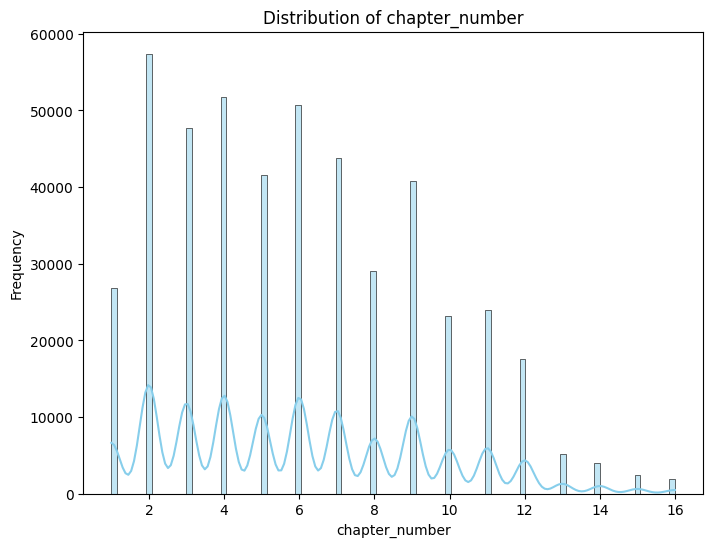

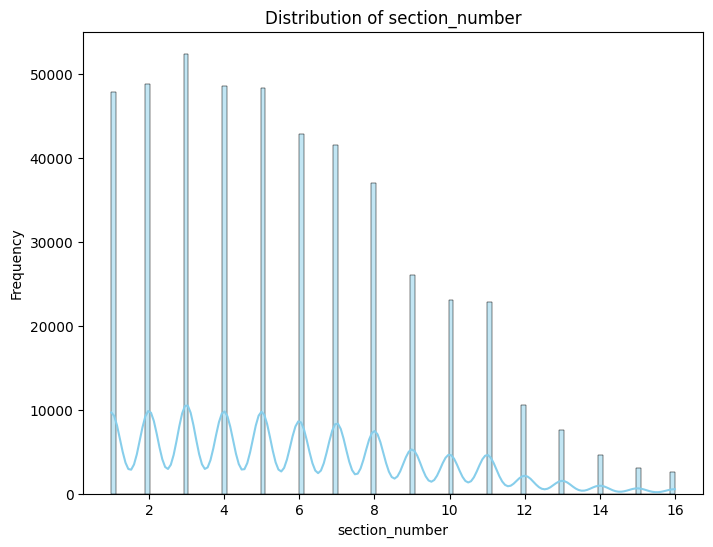

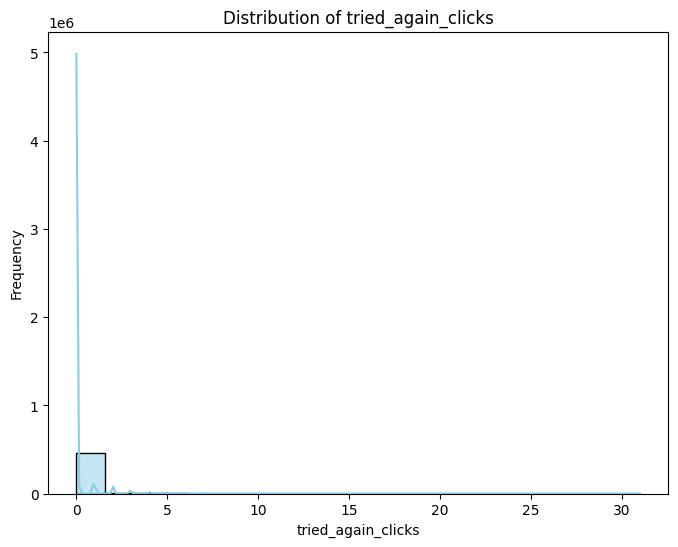

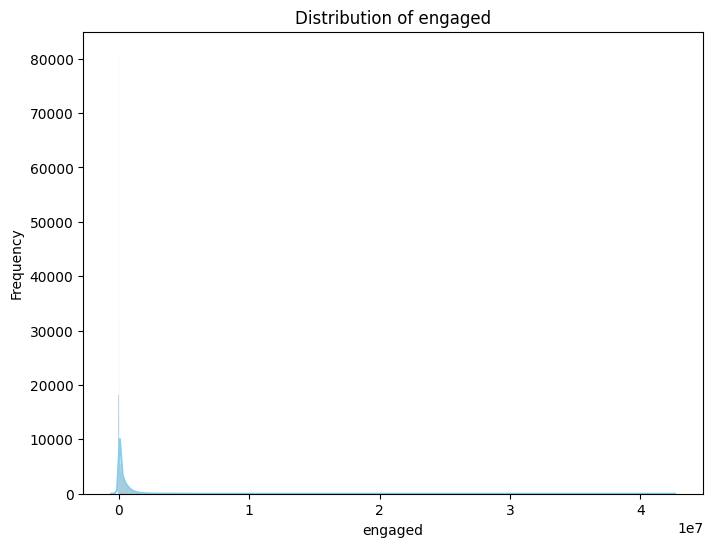

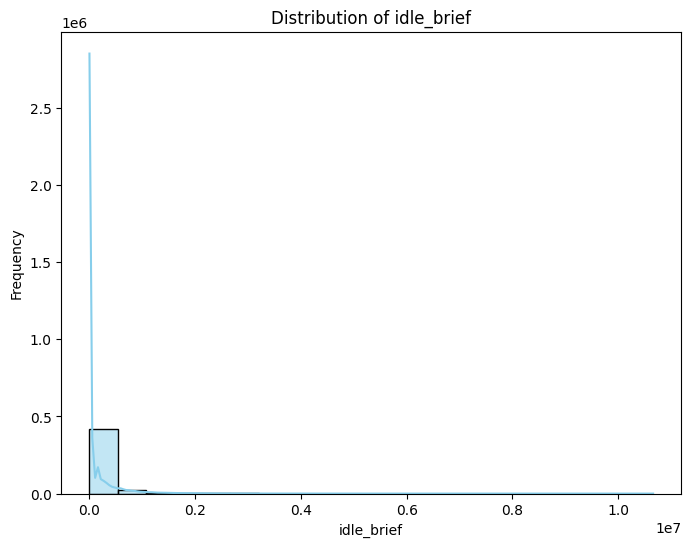

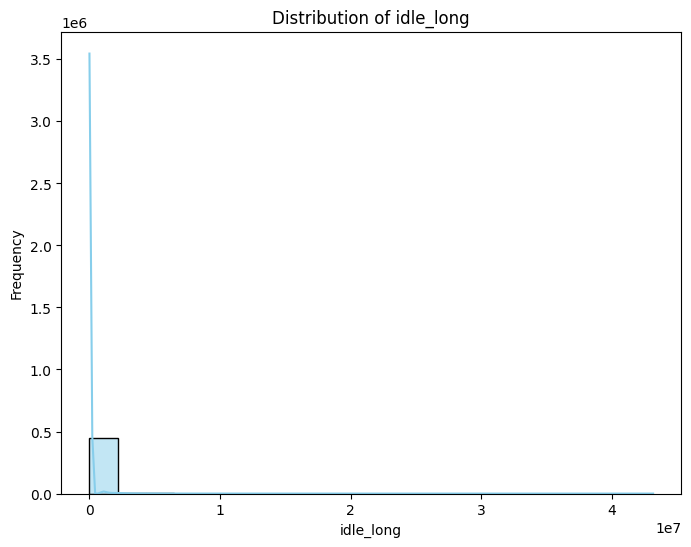

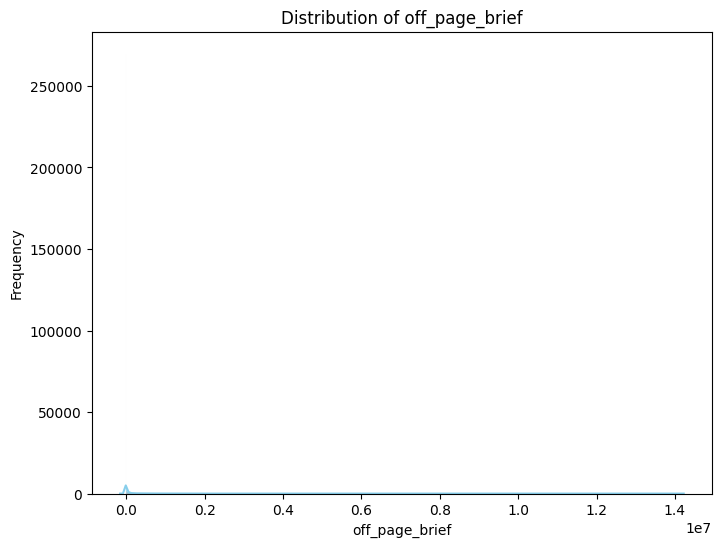

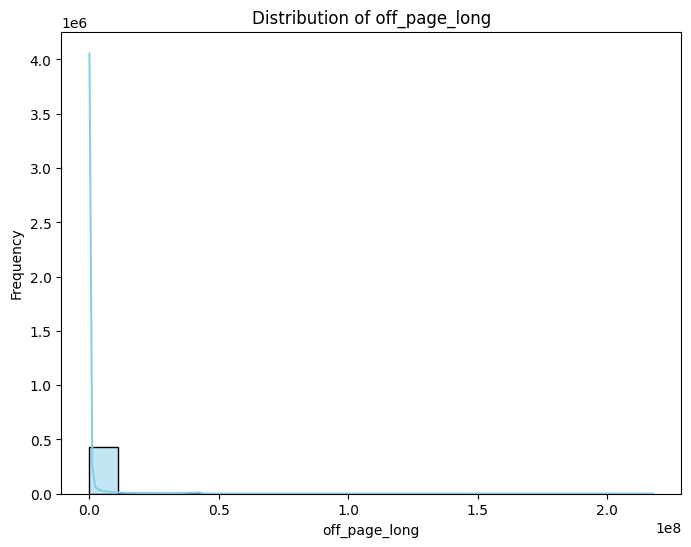

<Figure size 1000x800 with 0 Axes>

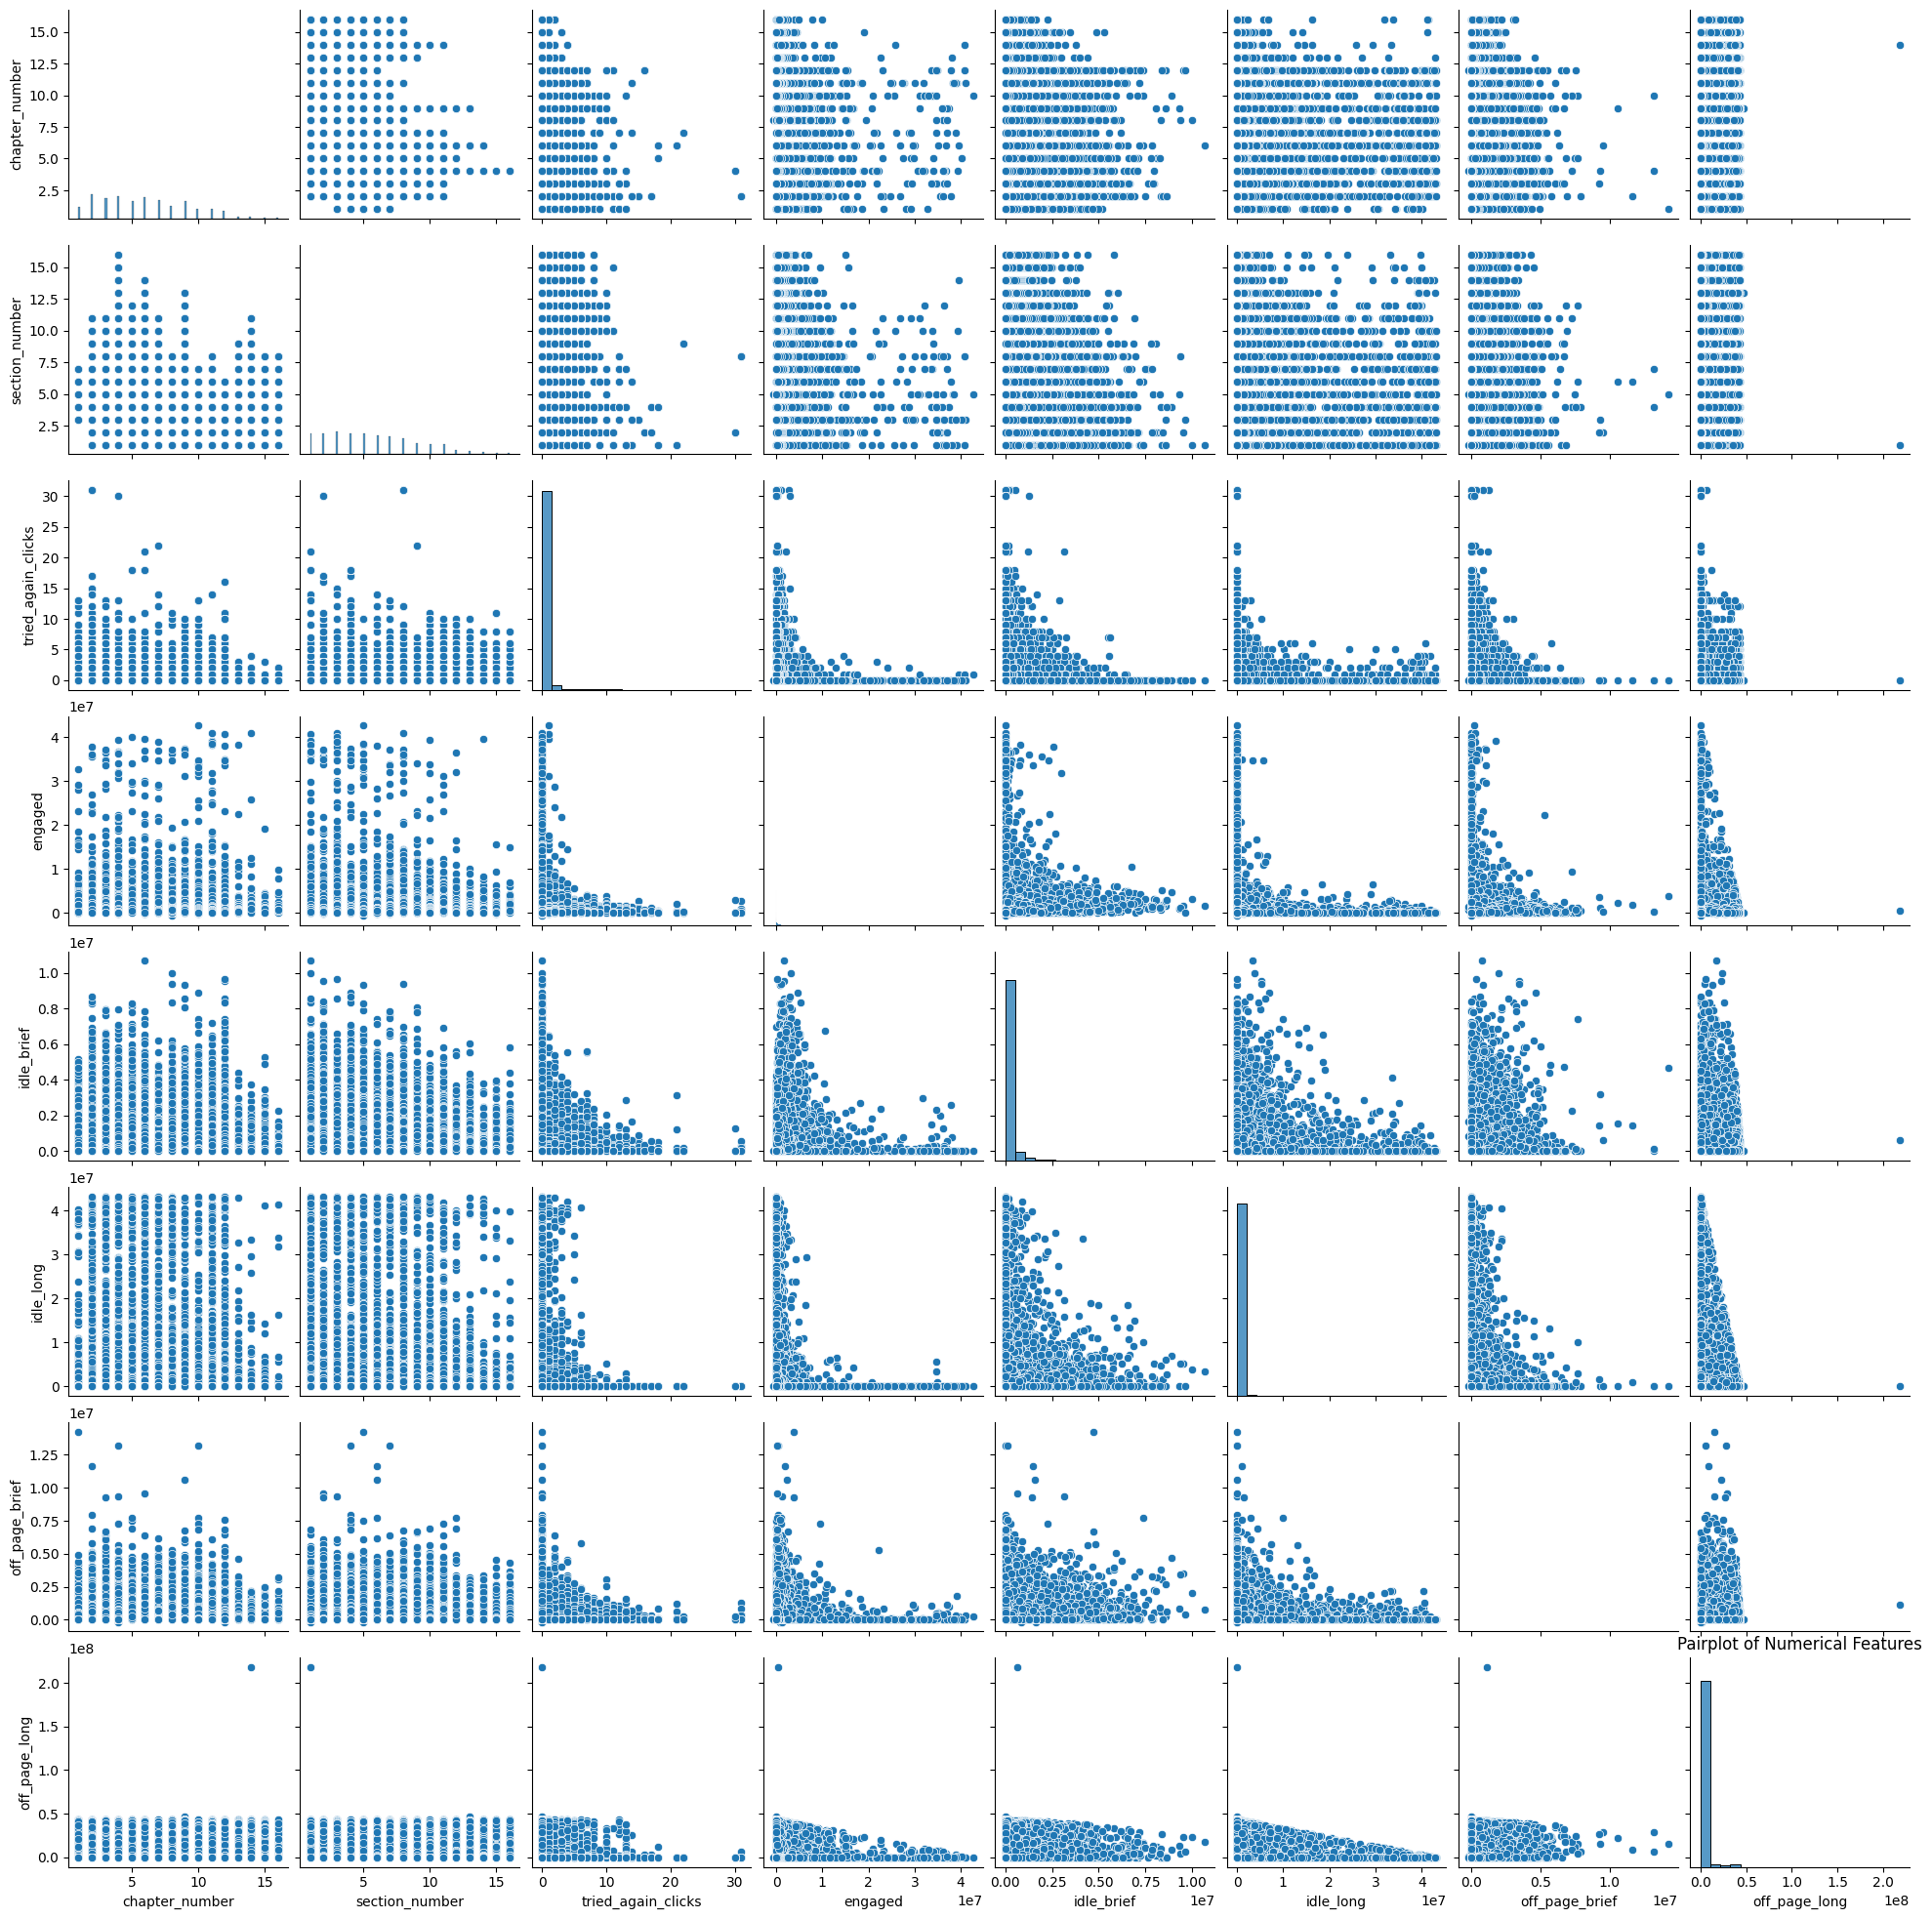

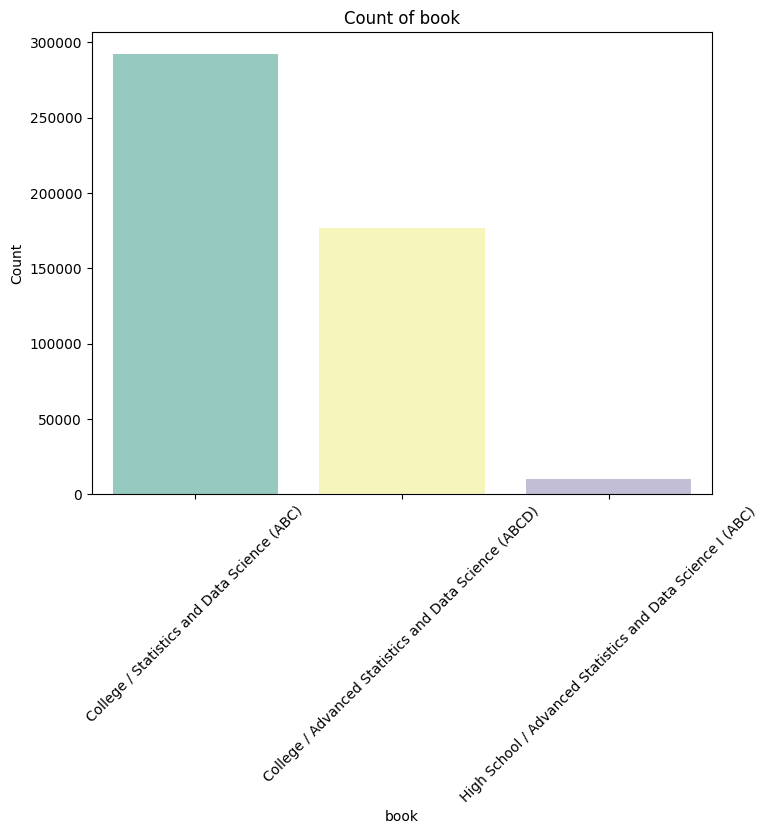

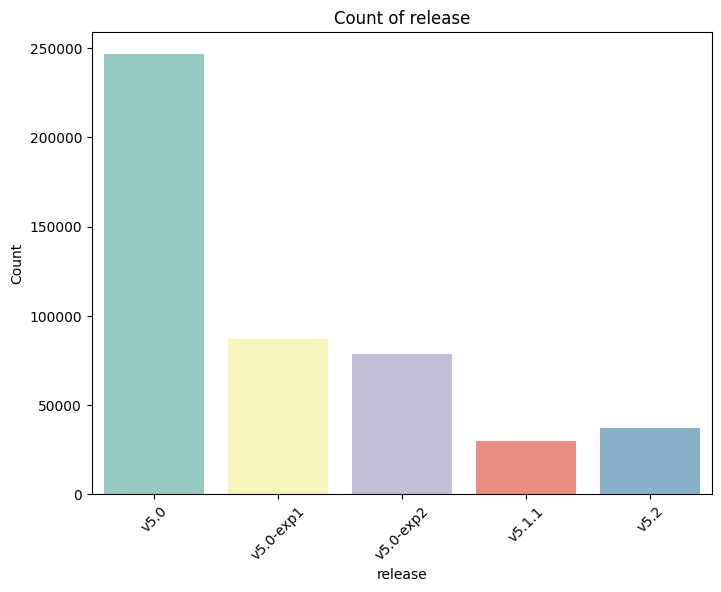

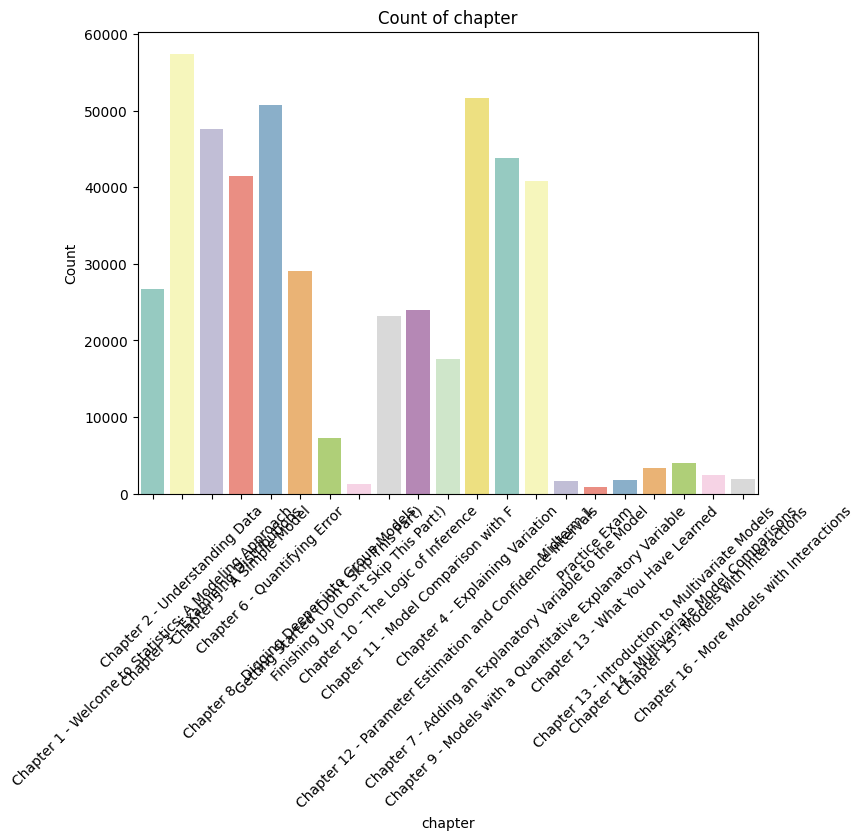

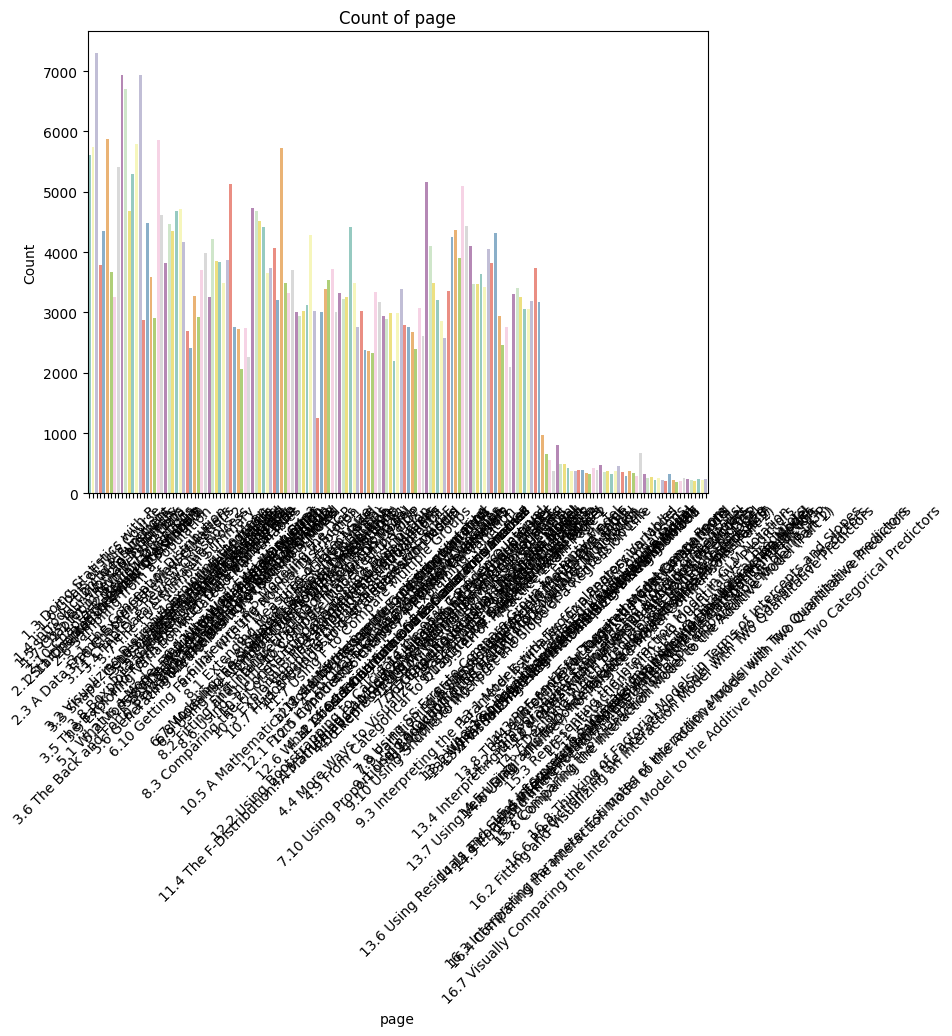

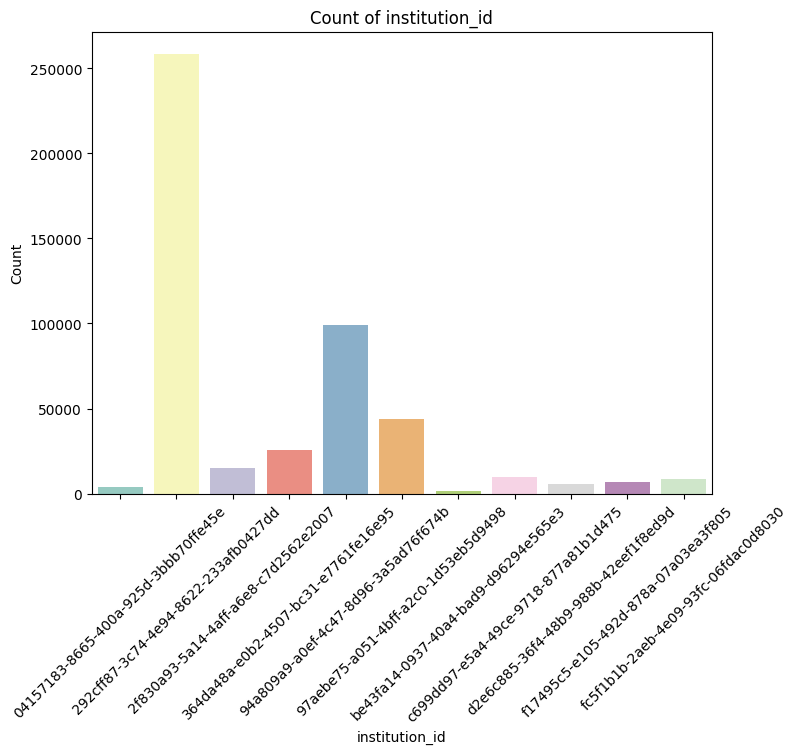

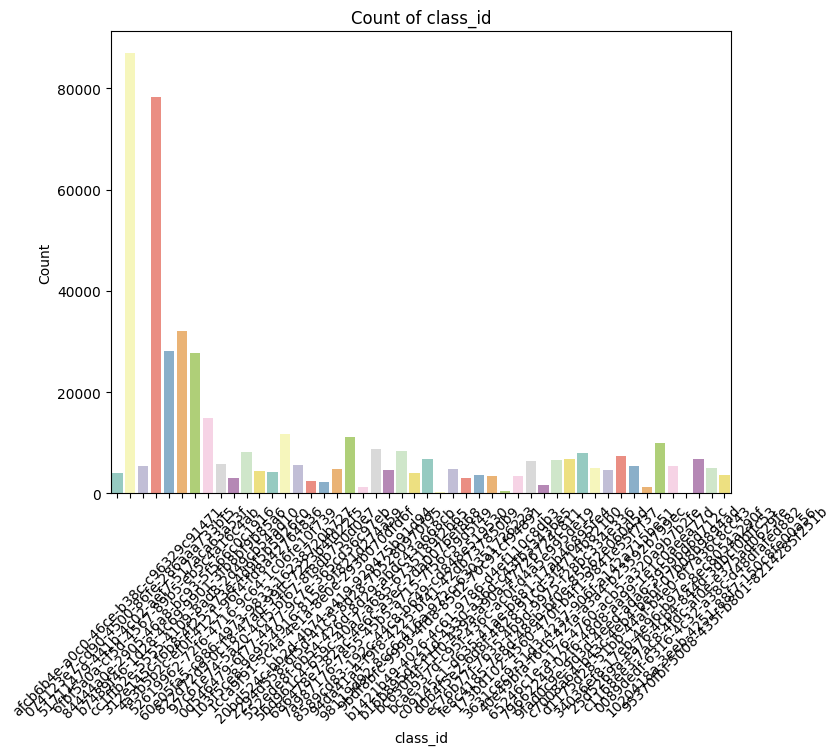

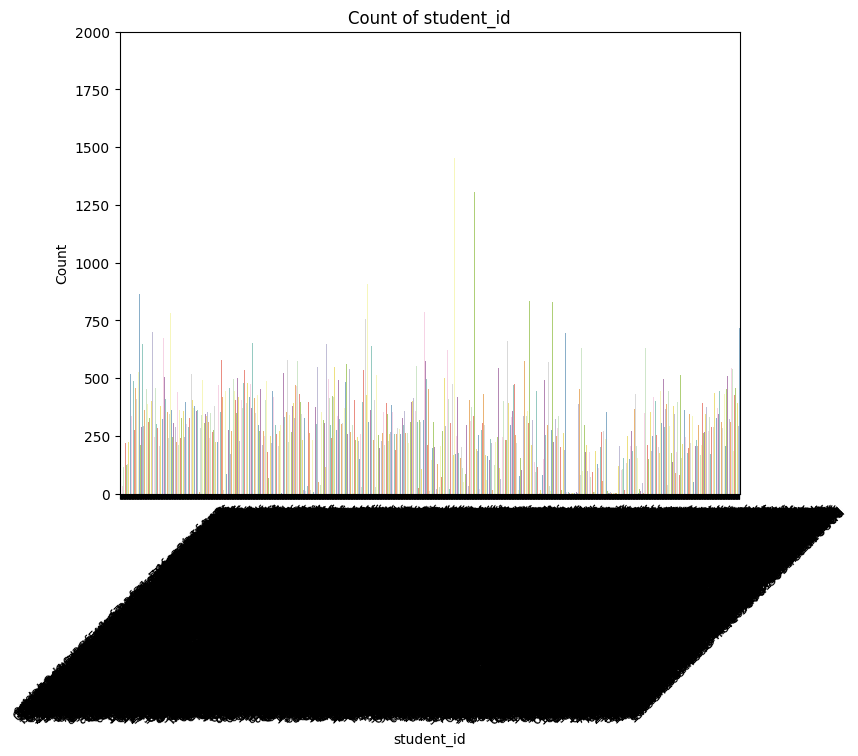

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x11052a070>>
Traceback (most recent call last):
  File "/Users/vijay/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [17]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(page_views_FU.head())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(page_views_FU.describe())

# Check for missing values
print("\nMissing values:")
print(page_views_FU.isnull().sum())

# Visualize distribution of numerical features
numerical_features = page_views_FU.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(page_views_FU[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Visualize relationships between numerical features
plt.figure(figsize=(10, 8))
sns.pairplot(page_views_FU[numerical_features])
plt.title('Pairplot of Numerical Features')
plt.show()

# Visualize relationships between categorical features
categorical_features = page_views_FU.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=page_views_FU, x=feature, palette='Set3')
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(page_views_FU.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Page_Views Analysis Questions

In [5]:
value_counts_release = page_views_FU['release'].value_counts()

print(value_counts_release)

value_counts_book = page_views_FU['book'].value_counts()
print(value_counts_book)
# potentially break up the data by book/version/chapter/student/class/institution
# engaged students vs idle students
# off page doing what? which sections of book?
# who was going back to videos? why? what were they going back to? (was_complete, tried_again_clicks, review_flag)
# Each student accesses multiple videos from multiple chapters 

page_views = page_views_FU[["institution_id", "class_id", "book", "release", "chapter", "page", "student_id", "was_complete", "tried_again_clicks", "engaged", "idle_brief", "idle_long", "off_page_brief", "off_page_long", "review_flag"]]
page_views.head()

release
v5.0         246877
v5.0-exp1     86891
v5.0-exp2     78274
v5.2          37140
v5.1.1        29570
Name: count, dtype: int64
book
College / Statistics and Data Science (ABC)                   292125
College / Advanced Statistics and Data Science (ABCD)         176607
High School / Advanced Statistics and Data Science I (ABC)     10020
Name: count, dtype: int64


institution_id                              class_id  \
0  04157183-8665-400a-925d-3bbb70ffe45e  afcb6b4e-a0c0-46ce-b38c-c96329c91471   
1  04157183-8665-400a-925d-3bbb70ffe45e  afcb6b4e-a0c0-46ce-b38c-c96329c91471   
2  04157183-8665-400a-925d-3bbb70ffe45e  afcb6b4e-a0c0-46ce-b38c-c96329c91471   
3  04157183-8665-400a-925d-3bbb70ffe45e  afcb6b4e-a0c0-46ce-b38c-c96329c91471   
4  04157183-8665-400a-925d-3bbb70ffe45e  afcb6b4e-a0c0-46ce-b38c-c96329c91471   

                                          book release  \
0  College / Statistics and Data Science (ABC)    v5.0   
1  College / Statistics and Data Science (ABC)    v5.0   
2  College / Statistics and Data Science (ABC)    v5.0   
3  College / Statistics and Data Science (ABC)    v5.0   
4  College / Statistics and Data Science (ABC)    v5.0   

                                             chapter  \
0  Chapter 1 - Welcome to Statistics: A Modeling ...   
1  Chapter 1 - Welcome to Statistics: A Modeling ...   
2  Chapter 1 - Welcome to Statistics: A Modeling ...   
3  Chapter 1 - Welcome to Statistics: A Modeling ...   
4  Chapter 1 - Welcome to Statistics: A Modeling ...   

                              page                            student_id  \
0      1.3 Doing Statistics with R  040852c0-3b9c-4fc6-8229-d7ba8264e9ce   
1      1.3 Doing Statistics with R  040852c0-3b9c-4fc6-8229-d7ba8264e9ce   
2      1.3 Doing Statistics with R  040852c0-3b9c-4fc6-8229-d7ba8264e9ce   
3      1.3 Doing Statistics with R  040852c0-3b9c-4fc6-8229-d7ba8264e9ce   
4  1.4 Introduction to R Functions  040852c0-3b9c-4fc6-8229-d7ba8264e9ce   

  was_complete  tried_again_clicks   engaged  idle_brief  idle_long  \
0        False                   0   58341.0         0.0        0.0   
1        False                   0  128493.0         0.0        0.0   
2        False                   0  101640.0         0.0        0.0   
3        False                   0   97608.0         0.0        0.0   
4        False                   0  177173.0         0.0        0.0   

   off_page_brief  off_page_long  review_flag  
0             0.0            0.0        False  
1         25928.0            0.0        False  
2             0.0            0.0        False  
3             0.0            0.0        False  
4             0.0            0.0        False

### Responses Analysis

In [ ]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(responses_FU.head())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(responses_FU.describe())

# Check for missing values
print("\nMissing values:")
print(responses_FU.isnull().sum())

# Visualize distribution of numerical features
numerical_features = responses_FU.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(responses_FU[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Visualize relationships between numerical features
plt.figure(figsize=(10, 8))
sns.pairplot(responses_FU[numerical_features])
plt.title('Pairplot of Numerical Features')
plt.show()

# Visualize relationships between categorical features
categorical_features = responses_FU.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=responses_FU, x=feature, palette='Set3')
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(page_views_FU.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Responses Analysis Questions

lrn_response_id
2b5fef7e-c2d8-405f-951f-bd1159440f00_6bd3c3b6467b896dd01dc66b0c3095ca    2
08b19e0c-8268-4949-bea5-3f03c53ab1ba_2b321cdd08db877396f18e9bc27b73fc    2
bb4a4a61-7a40-4adf-9fbe-fdbb87eb4b3e_12478439a5f99734e15c61ac9f9445cd    2
26bd5995-0b47-4c09-925b-a390e3770686_12478439a5f99734e15c61ac9f9445cd    2
2c98c3f4-a6d4-48b6-8fe8-e875d052a8fa_4b350cda75628ff4e3f894dff8ddd0ce    2
                                                                        ..
8636bf06-716d-47cb-bd20-ec61602c8cfc_a3488c13596a9cf7905758cad58c6056    1
ed4aa3b9-e8f0-4b81-be35-bba4441e137f_a3488c13596a9cf7905758cad58c6056    1
6be0f19f-7a40-4940-b471-a6b91c1fc768_a3488c13596a9cf7905758cad58c6056    1
56f4092f-f77e-4346-9cf5-e0388f9bea6f_a3488c13596a9cf7905758cad58c6056    1
8f26defa-52f4-42b5-90b9-7417139d9bce_dc199237492a2e3b0ff76d5352bdf3c1    1
Name: count, Length: 1185407, dtype: int64
                         institution_id                              class_id  \
0  292cff87-3c74-4e94-8622-233afb04

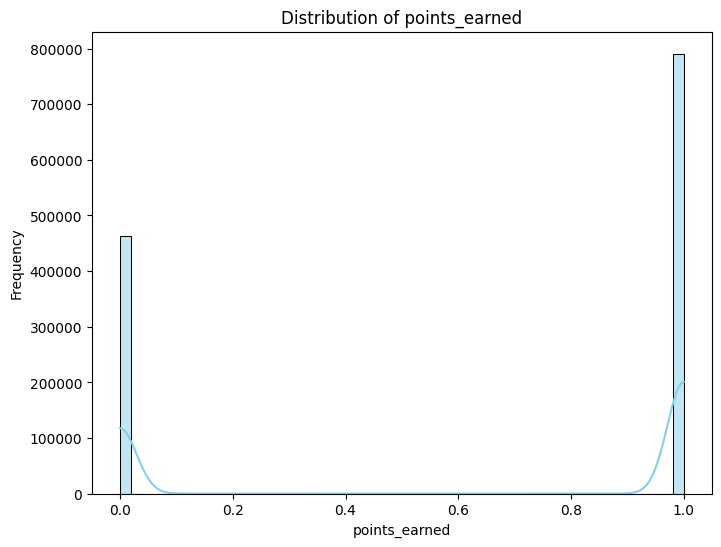

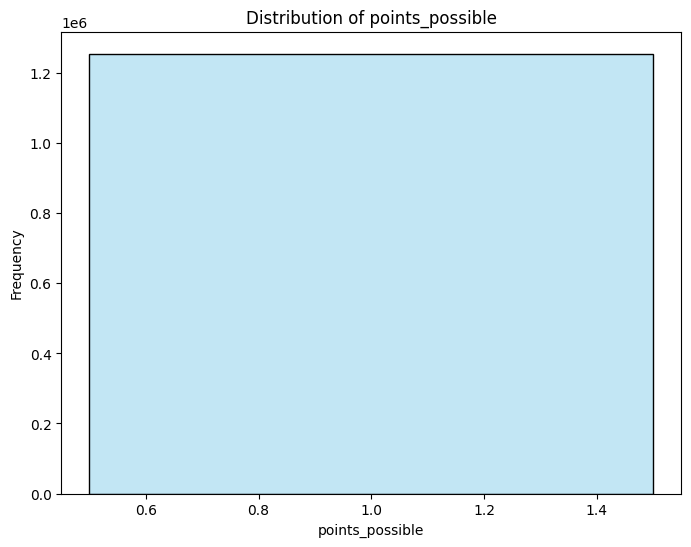

In [6]:
value_counts_res_id = responses_FU['lrn_response_id'].value_counts()
print(value_counts_res_id)
# almost 1 response id for every row, maybe find out why

responses = responses_FU[["institution_id", "class_id", "book", "release", "chapter", "page", "student_id", "prompt", "response", "item_type", "points_earned", "points_possible", "lrn_response_id"]]
print(responses.head())

print("Summary Satisitcs of numerical columns:")
print(responses.describe())

print("\nMissing values:")
print(responses.isnull().sum())

# this calculates every students grade based on points earned and points possible
student_id = 'student_id'
points_possible = 'points_possible'
points_earned = 'points_earned'

students_scores = responses.groupby('student_id').agg({'points_earned': 'sum', 'points_possible': 'sum'})
students_scores['total_percent'] = ((students_scores['points_earned'] / students_scores['points_possible']) * 100).round(2)
print(students_scores)

students_scores['average_grade'] = (students_scores['total_percent'] / students_scores.count())
print(students_scores)

# Visualize distribution of numerical features
numerical_features = responses.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(responses[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Visualize relationships between numerical features
#plt.figure(figsize=(10, 8))
#sns.pairplot(responses[numerical_features])
#plt.title('Pairplot of Numerical Features')
#plt.show()

# Visualize relationships between categorical features
#categorical_features = responses.select_dtypes(include=['object']).columns
#for feature in categorical_features:
 #   plt.figure(figsize=(8, 6))
  #  sns.countplot(data=responses, x=feature, palette='Set3')
   # plt.title(f'Count of {feature}')
    #plt.xlabel(feature)
    #plt.ylabel('Count')
    #plt.xticks(rotation=45)
    #plt.show()
    

# Correlation matrix
#plt.figure(figsize=(10, 8))
#sns.heatmap(responses.corr(), annot=True, cmap='coolwarm', fmt='.2f')
#plt.title('Correlation Matrix')
#plt.show()

### items_FU Analysis And Questions

In [ ]:
items_FU.head()
items_FU.tail()
items_FU.info()
items_FU.describe()

# Drop columns where all or nearly all values are missing
columns_to_drop = ['dcl_pre_exercise_code', 'dcl_sample_code', 'dcl_solution', 'dcl_sct', 'dcl_hint']
items_df_cleaned = items_FU.drop(columns=columns_to_drop)

# Uncomment the following line to drop rows with any missing values in 'lrn_activity_reference'
# items_df_cleaned = items_df_cleaned.dropna(subset=['lrn_activity_reference'])

# Filling missing numeric data with the median
items_df_cleaned['chapter_number'] = items_df_cleaned['chapter_number'].fillna(items_df_cleaned['chapter_number'].median())
items_df_cleaned['section_number'] = items_df_cleaned['section_number'].fillna(items_df_cleaned['section_number'].median())

# For categorical data,  decide to fill with a placeholder or the most common category
# For example, if 'lrn_type' had missing values (it doesn't in this case), you could fill with the most common type
# items_df_cleaned['lrn_type'] = items_df_cleaned['lrn_type'].fillna('Unknown')

#analysis 1:  Most Common Item Types

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of 'item_type'
plt.figure(figsize=(10, 6))
sns.countplot(data=items_df_cleaned, y='item_type')
plt.title('Distribution of Item Types')
plt.xlabel('Count')
plt.ylabel('Item Type')
plt.show()

# Most common item types
item_types_counts = items_df_cleaned['item_type'].value_counts().head()
print(item_types_counts)

#analysis 2:Distribution of Learning Activities Across Chapters
#Visualization of Learning Activity Types Across Chapters
plt.figure(figsize=(12, 8))
sns.countplot(data=items_df_cleaned, x='chapter_number', hue='lrn_type')
plt.title('Distribution of Learning Activity Types Across Chapters')
plt.xlabel('Chapter Number')
plt.ylabel('Count')
plt.legend(title='Learning Activity Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#analysis3:Distribution of Review Items Across Chapters and Sections
# Distribution of review items across chapters
review_items_chapters = items_df_cleaned[items_df_cleaned['review_flag'] == True]['chapter_number'].value_counts().sort_index()
print(review_items_chapters)

# For a more detailed analysis, you could also look at the distribution within sections
review_items_sections = items_df_cleaned[items_df_cleaned['review_flag'] == True]['section_number'].value_counts().sort_index()
print(review_items_sections)

#Box Plot of Question Positions Within Learning Activities
plt.figure(figsize=(10, 6))
sns.boxplot(data=items_df_cleaned, x='lrn_type', y='lrn_question_position')
plt.title('Distribution of Question Positions by Learning Activity Type')
plt.xlabel('Learning Activity Type')
plt.ylabel('Question Position')
plt.xticks(rotation=45)
plt.show()

# Creating a pivot table for the heatmap
heatmap_data = items_df_cleaned.pivot_table(index='chapter_number', columns='section_number', values='item_id', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Learning Activities by Chapter and Section')
plt.xlabel('Section Number')
plt.ylabel('Chapter Number')
plt.show()

# Example: Calculating the correlation coefficient between 'chapter_number' and 'section_number'
correlation = items_df_cleaned['chapter_number'].corr(items_df_cleaned['section_number'])
print(f"The correlation between chapter number and section number is: {correlation}")

# For visual insights, a scatter plot might be helpful
plt.figure(figsize=(8, 5))
sns.scatterplot(data=items_df_cleaned, x='chapter_number', y='section_number', alpha=0.6)
plt.title('Chapter vs. Section Number')
plt.xlabel('Chapter Number')
plt.ylabel('Section Number')
plt.show()

### Media Views Analysis And Questions

In [ ]:
media_views_FU.head()
media_views_FU.tail()
media_views_FU.info()
media_views_FU.describe()


# Convert 'dt_started' and 'dt_last_event' to datetime format
media_views_FU['dt_started'] = pd.to_datetime(media_views_FU['dt_started'])
media_views_FU['dt_last_event'] = pd.to_datetime(media_views_FU['dt_last_event'])

# Check for missing values in the dataset
missing_values = media_views_FU.isnull().sum()

# Fill missing numeric values with 0 (assuming missing means no access or activity)
media_views_FU['access_count'].fillna(0, inplace=True)
media_views_FU['proportion_video'].fillna(0, inplace=True)
media_views_FU['proportion_time'].fillna(0, inplace=True)

# Now let's see the missing values summary again to decide on further actions
missing_values_summary = media_views_FU.isnull().sum()
missing_values_summary


#Distribution of Access Counts

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Distribution of access counts
plt.figure(figsize=(10, 6))
sns.histplot(data=media_views_FU, x='access_count', bins=30, kde=True)
plt.title('Distribution of Access Counts')
plt.xlabel('Access Count')
plt.ylabel('Frequency')
plt.show()

media_views_FU.head()

# Proportion of video engagement
plt.figure(figsize=(10, 6))
sns.histplot(data=media_views_FU, x='proportion_video', bins=30, kde=True)
plt.title('Proportion of Video Engagement')
plt.xlabel('Proportion Video')
plt.ylabel('Frequency')
plt.show()

# Proportion of time engagement
plt.figure(figsize=(10, 6))
sns.histplot(data=media_views_FU, x='proportion_time', bins=30, kde=True)
plt.title('Proportion of Time Engagement')
plt.xlabel('Proportion Time')
plt.ylabel('Frequency')
plt.show()

# Top engaged students based on access count
top_engaged_students = media_views_FU.groupby('student_id')['access_count'].sum().sort_values(ascending=False).head(10)
print("Top Engaged Students by Access Count:")
print(top_engaged_students)
# Adding necessary columns for analysis
media_views_FU['day_of_week'] = media_views_FU['dt_started'].dt.day_name()
media_views_FU['hour_of_day'] = media_views_FU['dt_started'].dt.hour

# Activity by day of the week
activity_by_day = media_views_FU.groupby('day_of_week')['access_count'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
activity_by_day.plot(kind='bar')
plt.title('Activity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Access Count')
plt.show()

# Activity by hour of the day
activity_by_hour = media_views_FU.groupby('hour_of_day')['access_count'].sum()

plt.figure(figsize=(12, 6))
activity_by_hour.plot()
plt.title('Activity by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Access Count')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

#printing access counts
# Calculating total access count for each chapter
chapter_access_counts = media_views_FU.groupby('chapter')['access_count'].sum().sort_values()

# Identifying the chapters with the highest and lowest access counts
highest_access_chapters = chapter_access_counts.tail(5)  # Chapters with the most access counts
lowest_access_chapters = chapter_access_counts.head(5)   # Chapters with the least access counts

print("access counts:")
print(highest_access_chapters)

#Effect of Video Content on Engagement?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=media_views_FU, x='proportion_video', y='access_count')
plt.title('Effect of Video Content on Engagement')
plt.xlabel('Proportion of Video Viewed')
plt.ylabel('Access Count')
plt.show()

#Review Flag Usage
review_flag_usage = media_views_FU['review_flag'].value_counts()

plt.figure(figsize=(6, 4))
review_flag_usage.plot(kind='bar')
plt.title('Review Flag Usage')
plt.xlabel('Review Flag Set')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
plt.show()


### Final Columns

In [4]:
checkpoint_pulse_FU.columns

Index(['book', 'release', 'institution_id', 'class_id', 'student_id',
       'chapter_number', 'construct', 'response'],
      dtype='object')

In [5]:
checkpoints_eoc_FU.columns

Index(['student_id', 'class_id', 'chapter_number', 'book', 'EOC', 'n_possible',
       'n_correct', 'n_attempt'],
      dtype='object')

In [6]:
codebook_FU.columns

Index(['variable', 'description', 'source'], dtype='object')

In [7]:
items_FU.columns 

Index(['institution_id', 'class_id', 'item_id', 'item_type', 'chapter', 'page',
       'dcl_pre_exercise_code', 'dcl_sample_code', 'dcl_solution', 'dcl_sct',
       'dcl_hint', 'lrn_activity_reference', 'lrn_question_reference',
       'lrn_question_position', 'lrn_type', 'lrn_template_name',
       'chapter_number', 'section_number', 'review_flag'],
      dtype='object')

In [8]:
media_views_FU.columns

Index(['book', 'release', 'chapter', 'page', 'chapter_number',
       'section_number', 'institution_id', 'class_id', 'student_id',
       'media_id', 'dt_started', 'dt_last_event', 'access_count',
       'proportion_video', 'proportion_time', 'review_flag'],
      dtype='object')

In [9]:
page_views_FU.columns

Index(['book', 'release', 'chapter', 'page', 'chapter_number',
       'section_number', 'institution_id', 'class_id', 'student_id',
       'dt_accessed', 'was_complete', 'tried_again_dt', 'tried_again_clicks',
       'engaged', 'idle_brief', 'idle_long', 'off_page_brief', 'off_page_long',
       'review_flag'],
      dtype='object')

In [10]:
responses_FU.columns

Index(['book', 'release', 'chapter', 'page', 'chapter_number',
       'section_number', 'review_flag', 'institution_id', 'class_id',
       'student_id', 'item_id', 'item_type', 'response', 'prompt',
       'points_possible', 'points_earned', 'dt_submitted', 'completes_page',
       'attempt', 'user_agent', 'lrn_response_id', 'lrn_activity_reference',
       'lrn_question_reference', 'lrn_question_position', 'lrn_type',
       'lrn_dt_started', 'lrn_dt_saved', 'lrn_status', 'lrn_option_0',
       'lrn_option_1', 'lrn_option_2', 'lrn_option_3', 'lrn_option_4',
       'lrn_option_5', 'lrn_option_6', 'lrn_option_7', 'lrn_option_8',
       'lrn_option_9', 'lrn_option_10', 'lrn_option_11'],
      dtype='object')

### Remove Null Values And Clean Data

In [11]:
checkpoint_eoc = checkpoints_eoc_FU.dropna()
checkpoint_eoc.info()
print()
nan_count = checkpoint_eoc.isnull().sum().sum()
print('Number of NaN values:', nan_count)

<class 'pandas.core.frame.DataFrame'>
Index: 16348 entries, 0 to 16417
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   student_id      16348 non-null  object 
 1   class_id        16348 non-null  object 
 2   chapter_number  16348 non-null  int64  
 3   book            16348 non-null  object 
 4   EOC             16348 non-null  float64
 5   n_possible      16348 non-null  int64  
 6   n_correct       16348 non-null  int64  
 7   n_attempt       16348 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 1.1+ MB

Number of NaN values: 0


In [12]:
checkpoint_pulse = checkpoint_pulse_FU.dropna()
checkpoint_pulse.info()
print()
nan_count = checkpoint_pulse.isnull().sum().sum()
print('Number of NaN values:', nan_count)

<class 'pandas.core.frame.DataFrame'>
Index: 44462 entries, 3 to 76843
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book            44462 non-null  object 
 1   release         44462 non-null  object 
 2   institution_id  44462 non-null  object 
 3   class_id        44462 non-null  object 
 4   student_id      44462 non-null  object 
 5   chapter_number  44462 non-null  int64  
 6   construct       44462 non-null  object 
 7   response        44462 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 3.1+ MB

Number of NaN values: 0


In [13]:
items = items_FU.dropna()
items.info()
print()
nan_count = items.isnull().sum().sum()
print('Number of NaN values:', nan_count)

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   institution_id          0 non-null      object 
 1   class_id                0 non-null      object 
 2   item_id                 0 non-null      object 
 3   item_type               0 non-null      object 
 4   chapter                 0 non-null      object 
 5   page                    0 non-null      object 
 6   dcl_pre_exercise_code   0 non-null      float64
 7   dcl_sample_code         0 non-null      object 
 8   dcl_solution            0 non-null      object 
 9   dcl_sct                 0 non-null      object 
 10  dcl_hint                0 non-null      float64
 11  lrn_activity_reference  0 non-null      object 
 12  lrn_question_reference  0 non-null      object 
 13  lrn_question_position   0 non-null      float64
 14  lrn_type                0 non-null      object 
 15  lrn_te

In [14]:
media_views = media_views_FU.dropna()
media_views.info()
print()
nan_count = media_views.isnull().sum().sum()
print('Number of NaN values:', nan_count)

<class 'pandas.core.frame.DataFrame'>
Index: 1444 entries, 3 to 6147
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   book              1444 non-null   object 
 1   release           1444 non-null   object 
 2   chapter           1444 non-null   object 
 3   page              1444 non-null   object 
 4   chapter_number    1444 non-null   int64  
 5   section_number    1444 non-null   int64  
 6   institution_id    1444 non-null   object 
 7   class_id          1444 non-null   object 
 8   student_id        1444 non-null   object 
 9   media_id          1444 non-null   int64  
 10  dt_started        1444 non-null   object 
 11  dt_last_event     1444 non-null   object 
 12  access_count      1444 non-null   float64
 13  proportion_video  1444 non-null   float64
 14  proportion_time   1444 non-null   float64
 15  review_flag       1444 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(9)
mem

In [15]:
page_views = page_views_FU.dropna()
page_views.info()
print()
nan_count = page_views.isnull().sum().sum()
print('Number of NaN values:', nan_count)

<class 'pandas.core.frame.DataFrame'>
Index: 32524 entries, 11 to 477787
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   book                32524 non-null  object 
 1   release             32524 non-null  object 
 2   chapter             32524 non-null  object 
 3   page                32524 non-null  object 
 4   chapter_number      32524 non-null  float64
 5   section_number      32524 non-null  float64
 6   institution_id      32524 non-null  object 
 7   class_id            32524 non-null  object 
 8   student_id          32524 non-null  object 
 9   dt_accessed         32524 non-null  object 
 10  was_complete        32524 non-null  object 
 11  tried_again_dt      32524 non-null  object 
 12  tried_again_clicks  32524 non-null  int64  
 13  engaged             32524 non-null  float64
 14  idle_brief          32524 non-null  float64
 15  idle_long           32524 non-null  float64
 16  off_pag

In [16]:
responses = responses_FU.dropna()
responses.info()
print()
nan_count = responses.isnull().sum().sum()
print('Number of NaN values:', nan_count)

<class 'pandas.core.frame.DataFrame'>
Index: 258 entries, 997569 to 1440593
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   book                    258 non-null    object 
 1   release                 258 non-null    object 
 2   chapter                 258 non-null    object 
 3   page                    258 non-null    object 
 4   chapter_number          258 non-null    float64
 5   section_number          258 non-null    float64
 6   review_flag             258 non-null    bool   
 7   institution_id          258 non-null    object 
 8   class_id                258 non-null    object 
 9   student_id              258 non-null    object 
 10  item_id                 258 non-null    object 
 11  item_type               258 non-null    object 
 12  response                258 non-null    object 
 13  prompt                  258 non-null    object 
 14  points_possible         258 non-null  

### Category lables And Rating Thresholds

In [17]:
rating_thresholds_df = pd.DataFrame()

rating_thresholds_df['Student_ID_final'] = page_views['student_id']
rating_thresholds_df['Class_ID_final'] = page_views['class_id']
rating_thresholds_df['Points_Earned_final'] = responses['points_earned']
rating_thresholds_df['n_possible_final'] = checkpoint_eoc['n_possible']
rating_thresholds_df['response_final'] = checkpoint_pulse['response']
rating_thresholds_df['Engagement_time_final'] = page_views['engaged']
rating_thresholds_df['Idle_brief_final'] = page_views['idle_brief']
rating_thresholds_df['Idle_long_final'] = page_views['idle_long']
rating_thresholds_df['off_page_brief_final'] = page_views['off_page_brief']
rating_thresholds_df['off-page_long_final'] = page_views['off_page_long']
rating_thresholds_df['Proportion_time_final'] = media_views['proportion_time']
rating_thresholds_df['Proportion_video_final'] = media_views['proportion_video']
rating_thresholds_df['Was_complete_final'] = page_views['was_complete']
rating_thresholds_df['N_attempts_final'] = checkpoint_eoc['n_attempt']
rating_thresholds_df['Attempts_final'] = responses_FU['attempt']
rating_thresholds_df['Access_Count_Final'] = media_views['access_count']

rating_thresholds_df.fillna(0, inplace = True)


category_labels = ['Low Achiever', 'Average Achiever', 'High Achiever']

### Splitting the Data into Training, Validation, and Test Sets

In [18]:
from sklearn.model_selection import train_test_split

# Drop rows that have null values from both X and y
rating_thresholds_df.dropna(inplace=True)

# Split the data into features (X) and target label (y)
X = rating_thresholds_df.drop(columns=['Student_ID_final']) 
y = rating_thresholds_df['Student_ID_final']

# Split the data into training and temporary sets (the latter will be further split into validation and test sets)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Now split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training Set Size:", X_train.shape[0])
print("Validation Set Size:", X_val.shape[0])
print("Test Set Size:", X_test.shape[0])

Training Set Size: 22766
Validation Set Size: 4879
Test Set Size: 4879


### Feature Engineering

In [19]:
import numpy as np

# List of transformed features
transformed_features = ['Class_ID_final', 'Points_Earned_final', 'n_possible_final', 'response_final', 'Engagement_time_final', 'Idle_brief_final', 'Idle_long_final', 'off_page_brief_final', 'off-page_long_final', 'Proportion_time_final', 'Proportion_video_final', 'Was_complete_final', 'N_attempts_final', 'Attempts_final', 'Access_Count_Final']

# Apply log transformation to transformed features
for feature in transformed_features:
    # Check if the feature is numeric (either int or float)
    if X_train[feature].dtype in [np.int64, np.float64]:
        X_train[feature] = np.log1p(X_train[feature])
        X_val[feature] = np.log1p(X_val[feature])
        X_test[feature] = np.log1p(X_test[feature])
    else:
        # Convert non-numeric values to NaN
        X_train[feature] = pd.to_numeric(X_train[feature], errors='coerce')
        X_val[feature] = pd.to_numeric(X_val[feature], errors='coerce')
        X_test[feature] = pd.to_numeric(X_test[feature], errors='coerce')

print("Updated dataset after feature transformations:")
print(X_train.head())

# Determine the number of NaN values in each column
nan_counts_train = X_train.isna().sum()
nan_counts_val = X_val.isna().sum()
nan_counts_test = X_test.isna().sum()

print("\nNumber of NaN values in each column (Training set):")
print(nan_counts_train)
print("\nNumber of NaN values in each column (Validation set):")
print(nan_counts_val)
print("\nNumber of NaN values in each column (Test set):")
print(nan_counts_test)


Updated dataset after feature transformations:
        Class_ID_final  Points_Earned_final  n_possible_final  response_final  \
350812             NaN                  0.0               0.0        0.000000   
53666              NaN                  0.0               0.0        0.000000   
436080             NaN                  0.0               0.0        0.000000   
33845              NaN                  0.0               0.0        1.386294   
66247              NaN                  0.0               0.0        0.000000   

        Engagement_time_final  Idle_brief_final  Idle_long_final  \
350812              12.956280          0.000000              0.0   
53666                7.390799          0.000000              0.0   
436080              12.864033         11.699065              0.0   
33845               12.594320          0.000000              0.0   
66247               10.691581          0.000000              0.0   

        off_page_brief_final  off-page_long_final  Propor

### Rescaling The Data

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
data_scaler = MinMaxScaler()

# Apply log transformation and rescale to transformed features
small_epsilon = 1e-10
for feature in transformed_features:
    # Check if the feature is numeric (either int or float)
    if X_train[feature].dtype in [np.int64, np.float64]:
        # Apply log transformation
        X_train[feature] = np.log1p(X_train[feature] + small_epsilon)
        X_val[feature] = np.log1p(X_val[feature] + small_epsilon)
        X_test[feature] = np.log1p(X_test[feature] + small_epsilon)
        
        # Rescale the transformed features
        X_train[feature] = data_scaler.fit_transform(X_train[feature].values.reshape(-1, 1))
        X_val[feature] = data_scaler.transform(X_val[feature].values.reshape(-1, 1))
        X_test[feature] = data_scaler.transform(X_test[feature].values.reshape(-1, 1))
    else:
        print(f"Skipping log transformation and rescaling for non-numeric feature: {feature}")

print("Updated dataset after log transformation and rescaling:")
print(X_train.head())


Skipping log transformation and rescaling for non-numeric feature: Was_complete_final
Updated dataset after log transformation and rescaling:
        Class_ID_final  Points_Earned_final  n_possible_final  response_final  \
350812             NaN                  0.0               0.0        0.000000   
53666              NaN                  0.0               0.0        0.000000   
436080             NaN                  0.0               0.0        0.000000   
33845              NaN                  0.0               0.0        0.805005   
66247              NaN                  0.0               0.0        0.000000   

        Engagement_time_final  Idle_brief_final  Idle_long_final  \
350812               0.902265          0.000000              0.0   
53666                0.728107          0.000000              0.0   
436080               0.899995          0.903268              0.0   
33845                0.893270          0.000000              0.0   
66247                0.841658  

### Gradiant Boosting Classifier Model

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Define a pipeline with an imputer and Gradient Boosting classifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), 
    ('classifier', GradientBoostingClassifier())
])

# Define hyperparameters grid for tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

# Initialize GridSearchCV 
grid_search = GridSearchCV(pipeline,param_grid,cv=5, scoring='accuracy')

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict using the best model testing sets
y_test_pred_gb = best_model.predict(X_test)

# Print classification report for testing set
print("\nClassification Report for Test (Gradient Boosting):")
print(classification_report(y_test, y_test_pred_gb, target_names=category_labels))

# Calculate accuracy score for testing set
accuracy_test_gb = accuracy_score(y_test, y_test_pred_gb)
print("Accuracy Score for Test (Gradient Boosting):", accuracy_test_gb)


### Logistic Regression Model

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define a pipeline with an imputer and logistic regression classifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', LogisticRegression())
])

# Define hyperparameters grid for tuning
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'classifier__penalty': ['l1', 'l2'],  
    'classifier__solver': ['liblinear', 'saga']  
}

# Initialize GridSearchCV 
grid_search = GridSearchCV(pipeline,param_grid,cv=5, scoring='accuracy')

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict using the best model on testing sets
y_test_pred_gb = best_model.predict(X_test)

# Print classification report for testing set
print("\nClassification Report for Test (Gradient Boosting):")
print(classification_report(y_test, y_test_pred_gb, target_names=category_labels))

# Calculate accuracy score for testing set
accuracy_test_gb = accuracy_score(y_test, y_test_pred_gb)
print("Accuracy Score for Test (Gradient Boosting):", accuracy_test_gb)




### Random Forest Model

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define a pipeline with an imputer and Random Forest classifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier())
])

# Define hyperparameters grid for tuning
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'classifier__penalty': ['l1', 'l2'],  
    'classifier__solver': ['liblinear', 'saga']  
}

# Initialize GridSearchCV 
grid_search = GridSearchCV(pipeline,param_grid,cv=5, scoring='accuracy')

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict using the best model on testing sets
y_test_pred_gb = best_model.predict(X_test)

# Print classification report for testing set
print("\nClassification Report for Test (Gradient Boosting):")
print(classification_report(y_test, y_test_pred_gb, target_names=category_labels))

# Calculate accuracy score for testing set
accuracy_test_gb = accuracy_score(y_test, y_test_pred_gb)
print("Accuracy Score for Test (Gradient Boosting):", accuracy_test_gb)




### Visuals

### Project Summary